In [769]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [770]:
import openai

In [771]:
openai.__version__

'0.27.8'

In [772]:
import numpy as np
from webcolors import hex_to_rgb
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)  

## Load Data

In [773]:
def load_raw_data():
    df_pubmed = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="Harmonized Information Extracti")
    df_pubmed['publication_type'] = "biomedical_journal"
    df_acl = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="ACLEMNLP Google Scholar")
    df_acl['publication_type'] = "nlp_venue"
    return df_pubmed, df_acl

In [774]:
df_pubmed, df_acl = load_raw_data()

In [775]:
def load_raw_data_included_all():
    df_pubmed, df_acl = load_raw_data()
    df_included = df_pubmed[df_pubmed['Included'] == 1.0]
    df_acl_included = df_acl[df_acl['Included'] == 1.0]
    df = pd.concat([df_included, df_acl_included], ignore_index=True)
    df['year'] = df['year'].astype(int)
    print(df_pubmed.shape, df_included.shape, df_acl.shape, df_acl_included.shape)
    return df

In [777]:
df_2024 = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="SED Version Sijing Extractions ")
## ALIGN WITH PREVIOUS NAMES
# Replace 'Association for Computational Linguistics' with 'ACL'
df_2024['journal'] = df_2024['journal'].str.replace('Association for Computational Linguistics', 'ACL', regex=False)
df_2024['journal'] = df_2024['journal'].str.replace('BMC bioinformatics', 'BMC Bioinformatics', regex=False)
df_2024['journal'] = df_2024['journal'].str.replace('Frontiers in psychiatry', 'Frontiers in Psychiatry', regex=False)

# Replace 'ACL Findings' followed by any characters with 'ACL/Findings'
df_2024['journal'] = df_2024['journal'].str.replace(r'ACL Findings.*', 'ACL/ Findings', regex=True)
df_2024['journal'] = df_2024['journal'].str.replace(r'Findings of the ACL.*', 'ACL/ Findings', regex=True)

df_2024['journal'] = df_2024['journal'].str.replace(r'EMNLP.*', 'EMNLP', regex=True)


In [743]:
df_2024['publication_type'] = np.where(
    df_2024['journal'].str.contains('EMNLP|ACL'), 
    'nlp_venue', 
    'biomedical_journal'
)

In [744]:
df_2024_included = df_2024[df_2024['Included'] == 1.0]
df_2024_included.loc[:, 'year'] = df_2024_included['year'].astype(int)


/Users/donevas/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [745]:
set(df_2024_included['journal'])

{'ACL/ Findings',
 'Artificial Intelligence in the Life Sciences',
 'Artificial intelligence in medicine',
 'BMC Bioinformatics',
 'BMC Medical Informatics and Decision Making',
 'BMJ Health & Care Informatics',
 'Bioinformatics',
 'Chemical Research in Toxicology',
 'Frontiers in Genetics',
 'Frontiers in Neuroinformatics',
 'Frontiers in Pharmacology',
 'Frontiers in Psychiatry',
 'Genes & Genomics',
 'Indian Dermatology Online Journal',
 'Informatics in Medicine Unlocked',
 'Journal of Biomedical Informatics',
 'Journal of Biomedical Semantics',
 'Journal of Computational Biology',
 'Journal of Medical Internet Research',
 'Journal of the American Heart Association',
 'Journal of the American Medical Informatics Association',
 'Molecular & Cellular Proteomics',
 'Neurocomputing',
 'Plos one',
 'Proceedings of the 68th Annual Meeting of the German Association of Medical Informatics, Biometry, and Epidemiology',
 'Radiology',
 'Scientific Reports',
 'Systematic Reviews',
 'The 22nd Wo

In [746]:
df_2024_included.groupby("publication_type")["title"].count()

publication_type
biomedical_journal    49
nlp_venue             10
Name: title, dtype: int64

In [747]:
df = load_raw_data_included_all()

(504, 71) (89, 71) (491, 68) (51, 68)


In [748]:
df = pd.concat([df, df_2024_included], ignore_index=True)

In [749]:
df.shape

(199, 73)

In [750]:
df.groupby("publication_type")["title"].count()

publication_type
biomedical_journal    138
nlp_venue              61
Name: title, dtype: int64

In [515]:
df.head(3)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,...,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Unnamed: 32
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,...,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,...,"Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journal of Biomedical Informatics,2020,BVI,1.0,NaN,Text Classification,...,"Ambalavanan, Ashwin Karthik Devarakonda, Murth...",Using the contextual language model BERT for m...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN


### random sample for a pilot with student

In [138]:
# Sample 3 random rows from df_included
df_included_sampled = df_pubmed[df_pubmed['Included'] == 1.0].sample(n=3, random_state=42)

# Sample 2 random rows from df_acl_included
df_acl_included_sampled = df_acl[df_acl['Included'] == 1.0].sample(n=2, random_state=42)

# Combine the sampled DataFrames
combined_df = pd.concat([df_included_sampled, df_acl_included_sampled])
combined_df_first_cols = combined_df.iloc[:, :6]

# Display the combined DataFrame
combined_df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,...,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40
219,"Li, D. and Xiong, Y. and Hu, B. and Tang, B. a...",10.1186/s12911-021-01614-7,https://doi.org/10.1186/s12911-021-01614-7,Drug knowledge discovery via multi-task learni...,BMC Medical Informatics & Decision Making,2021.0,SDO,1.0,NaN,Information Extraction,...,"Research Support, Non-U.S. Gov't","Li, Dongfang Xiong, Ying Hu, Baotian Tang, Buz...",Drug knowledge discovery via multi-task learni...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
265,"Martenot, V. and Masdeu, V. and Cupe, J. and G...",10.1186/s12911-022-02085-0,https://doi.org/10.1186/s12911-022-02085-0,LiSA: an assisted literature search pipeline f...,BMC Medical Informatics & Decision Making,2022.0,SDO,1.0,NaN,Information Retrieval,...,"Research Support, Non-U.S. Gov't","Martenot, Vincent Masdeu, Valentin Cupe, Jean ...",LiSA: an assisted literature search pipeline f...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
166,"Ji, Z. and Wei, Q. and Xu, H.",NaN,https://doi.org/,BERT-based Ranking for Biomedical Entity Norma...,AMIA Summits on Translational Science Proceedings,2020.0,SDO,1.0,NaN,Entity Normalization/Linking,...,NaN,"Ji, Zongcheng Wei, Qiang Xu, Hua and ASReview_...",BERT-based Ranking for Biomedical Entity Norma...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
132,"['Liu, Z.', 'Xiong, C.', 'Dai, Z.', 'Sun, S.',...",10.18653/v1/2020.findings-emnlp.216,https://aclanthology.org/2020.findings-emnlp.2...,Adapting open domain fact extraction and verif...,Association for Computational Linguistics/ Fin...,2020.0,SDO,1.0,NaN,Fact Verification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nlp_venue,NaN
256,"['Lu, Q.', 'Dou, D.', 'Nguyen, T.']",NaN,https://aclanthology.org/2022.findings-emnlp.3...,ClinicalT5: A generative language model for cl...,Association for Computational Linguistics/ Fin...,2022.0,SDO,1.0,NaN,Multi-Domain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nlp_venue,NaN


In [139]:
combined_df_first_cols.to_csv("sample_to_test_new_extractor.csv")

In [140]:
combined_df.to_csv("full_sample_to_test_new_extractor.csv")

# Summer School SRs

In [141]:
filtered_df_sr = df[df['Domain of automated approach'].str.contains('Systematic', na=False)]
filtered_df_sr = filtered_df_sr[['Domain of automated approach', 'Target application']]
filtered_df_sr[['Approach Keywords', 'Application description']] = filtered_df_sr['Domain of automated approach'].str.split(':', 1, expand=True)
filtered_df_sr['Approach Keywords'] = filtered_df_sr['Approach Keywords'].str.replace('Systematic Reviews/', '')
filtered_df_sr['Approach Keywords'] = filtered_df_sr['Approach Keywords'].str.replace(' Systematic Reviews', '')
filtered_df_sr['Approach Keywords'] = filtered_df_sr['Approach Keywords'].str.replace('Systematic Reviews', '')

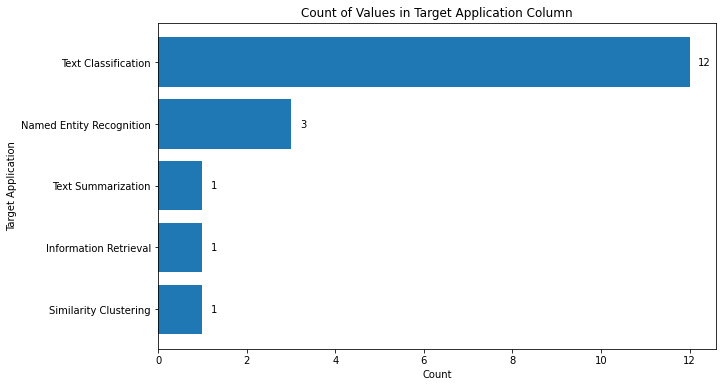

In [142]:
# Counting values in the 'Target application' column
value_counts = filtered_df_sr['Target application'].value_counts()

# Sorting by highest count
value_counts = value_counts.sort_values(ascending=True)

# Increasing image size
plt.figure(figsize=(10, 6))

# Creating a horizontal bar plot with sorted values
plt.barh(value_counts.index, value_counts.values)
plt.ylabel('Target Application')
plt.xlabel('Count')
plt.title('Count of Values in Target Application Column')

# Displaying count values next to each bar
for i, count in enumerate(value_counts.values):
    plt.text(count + 0.2, i, str(count), va='center')

plt.show()

In [143]:
filtered_df_sr.head()

,Domain of automated approach,Target application,Approach Keywords,Application description
2,Literature Screening/ Combination of Selection...,Text Classification,Literature Screening/ Combination of Selection...,Screening scientific articles for systematic ...
4,Literature Screening/ Systematic Reviews/ Moxi...,Text Classification,Literature Screening/ Moxibustion for improvi...,Screening scientific articles for systematic ...
7,Literature Screening/ PICO Recognition/ Biome...,Named Entity Recognition,Literature Screening/ PICO Recognition/ Biome...,PICO recognition (as NER) to improve referenc...
12,Literature Screening/ Systematic Reviews/ Neur...,Text Classification,Literature Screening/ Neurosurgery,Classification of Short Scientific Texts to i...
13,Literature-Based Discovery/ Thematically Coher...,Similarity Clustering,Literature-Based Discovery/ Thematically Coher...,Assist domain specialists in comprehending th...


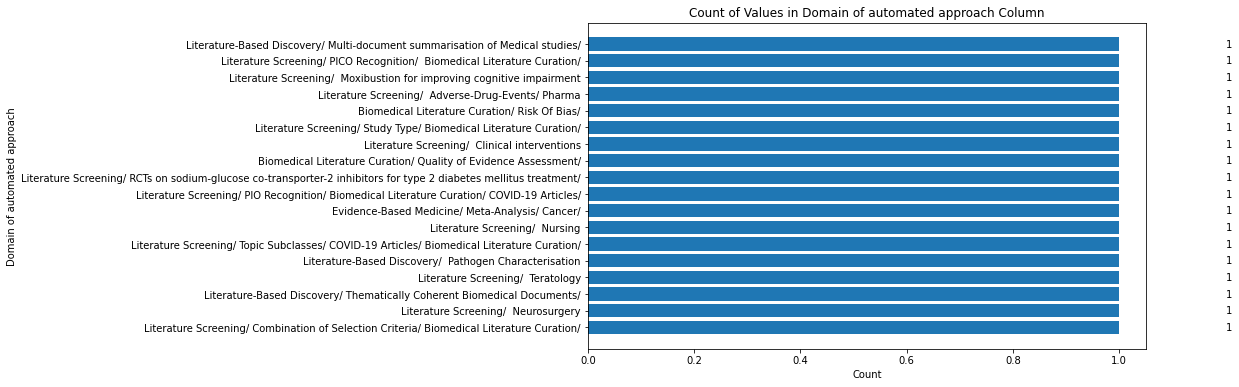

In [144]:
# Counting values in the 'Target application' column
value_counts = filtered_df_sr['Approach Keywords'].value_counts()

# Sorting by highest count
value_counts = value_counts.sort_values(ascending=True)

# Increasing image size
plt.figure(figsize=(10, 6))

# Creating a horizontal bar plot with sorted values
plt.barh(value_counts.index, value_counts.values)
plt.ylabel('Domain of automated approach')
plt.xlabel('Count')
plt.title('Count of Values in Domain of automated approach Column')

# Displaying count values next to each bar
for i, count in enumerate(value_counts.values):
    plt.text(count + 0.2, i, str(count), va='center')

plt.show()

In [145]:
df = filtered_df_sr[['Approach Keywords','Target application']]

In [146]:
# Splitting the column and unpacking into different columns
split_columns = df['Approach Keywords'].str.split('/', expand=True)

# Renaming the split columns
split_columns.columns = [f'Level_{i+1}' for i in range(split_columns.shape[1])]

# Combining the original DataFrame with the split columns
df = pd.concat([df, split_columns], axis=1)

# Dropping the original column
df.drop(columns=['Approach Keywords'], inplace=True)
df.drop(columns=['Level_5'], inplace=True)

df['Count'] = 1
df

,Target application,Level_1,Level_2,Level_3,Level_4,Count
2,Text Classification,Literature Screening,Combination of Selection Criteria,Biomedical Literature Curation,,1
4,Text Classification,Literature Screening,Moxibustion for improving cognitive impairment,None,None,1
7,Named Entity Recognition,Literature Screening,PICO Recognition,Biomedical Literature Curation,,1
12,Text Classification,Literature Screening,Neurosurgery,None,None,1
13,Similarity Clustering,Literature-Based Discovery,Thematically Coherent Biomedical Documents,,None,1
25,Text Classification,Literature Screening,Teratology,None,None,1
31,Text Classification,Literature-Based Discovery,Pathogen Characterisation,None,None,1
39,Text Classification,Literature Screening,Topic Subclasses,COVID-19 Articles,Biomedical Literature Curation,1
54,Text Classification,Literature Screening,Nursing,None,None,1
57,Named Entity Recognition,Evidence-Based Medicine,Meta-Analysis,Cancer,,1


In [147]:
l1 = df["Level_1"].to_list()
l2 = df["Level_2"].to_list()
connect_values = df["Count"].to_list()
levels_combined = list(set(l1+l2))
#levels_combined
node_dict = {y:x for x, y in enumerate(levels_combined)}
node_dict

source = l1 
target = l2  
values = connect_values 

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

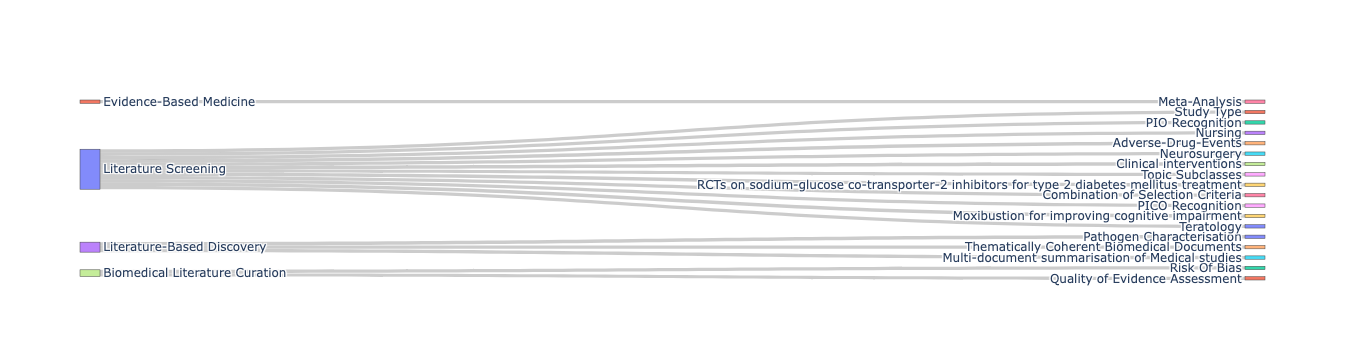

In [148]:
import plotly.graph_objects as go # Import the graphical object

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = levels_combined
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

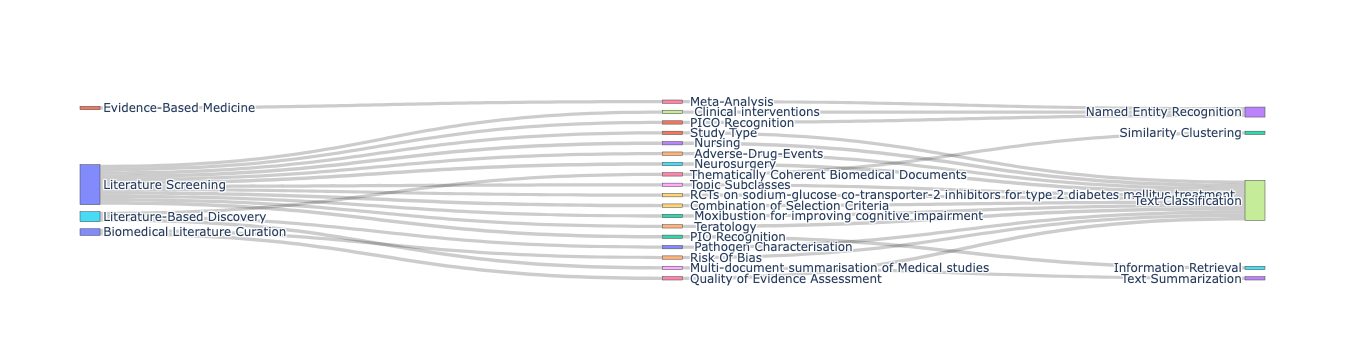

In [149]:
l1 = df["Level_1"].to_list()
l2 = df["Level_2"].to_list()
l3 = df["Target application"].to_list()
connect_values = df["Count"].to_list()

levels_combined = list(set(l1 + l2 + l3))
node_dict = {y: x for x, y in enumerate(levels_combined)}

source = l1 + l2
target = l2 + l3
values = connect_values * 2  # Duplicate for each level

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

values_combined = [f'Outgoing: {value}' for value in values]  # Include "Outgoing:"

fig = go.Figure(
    data=[go.Sankey(
        node=dict(
            label=levels_combined
        ),
        link=dict(
            source=source_node,
            target=target_node,
            value=values,
            label=values_combined  # Use the modified values_combined list
        ))])

# With this save the plots
plot(fig,
     image_filename='sankey_plot_1',
     image='png',
     image_width=1000,
     image_height=600)

# And show the plot
fig.show()


# Explorative

## Overview excluded papers

In [486]:
df_bio_excluded = df_pubmed[df_pubmed['Included'] == 0]
df_acl_excluded = df_acl[df_acl['Included'] == 0]
df_2024_excluded = df_2024[df_2024['Included'] == 0]

len(df_bio_excluded), len(df_acl_excluded), len(df_2024_excluded)

(406, 32, 76)

In [487]:
df_excluded = pd.concat([df_bio_excluded, df_acl_excluded, df_2024_excluded], ignore_index=True)
df_excluded['year'] = df_excluded['year'].astype(int)

In [488]:
df_excluded = df_excluded[["Reason for exclusion", "year", "publication_type"]]

In [489]:
df_excluded

,Reason for exclusion,year,publication_type
0,No LLMs,2017,biomedical_journal
1,No LLMs,2021,biomedical_journal
2,No LLMs,2022,biomedical_journal
3,No LLMs,2018,biomedical_journal
4,Review,2021,biomedical_journal
...,...,...,...
509,NaN,2023,biomedical_journal
510,No LLMs,2023,biomedical_journal
511,DUPLICATE,2023,biomedical_journal
512,Review Paper,2023,biomedical_journal


In [490]:
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'^No biomedical focus.*$', 'Different focus', regex=True)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'^Focus on.*$', 'Different focus', regex=True)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'^Not focused on model.*$', 'Different focus', regex=True)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'^Not English.*$', 'Not English', regex=True)

df_excluded.groupby(['Reason for exclusion']).size().sort_values()

Reason for exclusion
No LLMs, Review Paper                                   1
Survey                                                  1
WITHDRAWN due to integrity concerns                     1
Not text                                                2
no access                                               2
Protocol, not the actual work                           3
No LLMs (although benchmaerked with a BERT system)      8
DUPLICATE                                               9
Review                                                 12
Not English                                            15
No biomedical domain                                   20
Review Paper                                           30
Different focus                                        43
No LLMs                                               363
dtype: int64

## Overview papers metadata

In [516]:
df = pd.concat([df_included, df_acl_included, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,...,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Unnamed: 32
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,...,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,...,"Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journal of Biomedical Informatics,2020,BVI,1.0,NaN,Text Classification,...,"Ambalavanan, Ashwin Karthik Devarakonda, Murth...",Using the contextual language model BERT for m...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN
3,"Asada, M. and Miwa, M. and Sasaki, Y.",10.1093/bioinformatics/btac754,https://doi.org/10.1093/bioinformatics/btac754,Integrating heterogeneous knowledge graphs int...,Bioinformatics,2023,BVI,1.0,NaN,Relation Extraction,...,"Using Smart Source Parsing 01 Asada, Masaki Mi...",Integrating heterogeneous knowledge graphs int...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN
4,"Aum, S. and Choe, S.",10.1186/s13643-021-01763-w,https://doi.org/10.1186/s13643-021-01763-w,srBERT: automatic article classification model...,Systematic Reviews,2021,BVI,1.0,NaN,Text Classification,...,"Aum, Sungmin Choe, Seon and ASReview_relevant",srBERT: automatic article classification model...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN


<Figure size 720x576 with 0 Axes>

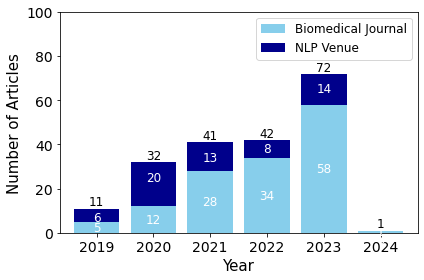

In [766]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 8))

# Group by year and publication type, then count the occurrences
counts = df.groupby(['year', 'publication_type']).size().unstack(fill_value=0)

# Plot the stacked bar chart
bars = counts.plot(kind='bar', stacked=True, color=['skyblue', 'darkblue'], width=0.8)

# Define a threshold for label adjustment (e.g., 5)
label_threshold = 5

# Add count values as annotations for each bar
for i, year in enumerate(counts.index):
    for pub_type, count in zip(counts.columns, counts.loc[year]):
        if pub_type == "biomedical_journal":
            plt.text(i, count/2 , str(count), color='white' if count < counts.sum(axis=1).max() else 'black', ha='center', va='center', fontsize=12)
        else:
            total_count = counts.sum(axis=1)[year]
            va = 'center' if count < 10 else 'top' if count >= label_threshold else 'bottom'
            plt.text(i, total_count - 4, str(count), color='white' if count < counts.sum(axis=1).max() else 'black', ha='center', va=va, fontsize=12)

# Add total count values on top of each bar
for i, total_count in enumerate(counts.sum(axis=1)):
    plt.text(i, total_count, str(total_count), color='black', ha='center', va='bottom', fontsize=12)
    
# Set the y-axis limit to ensure it reaches up to 45
plt.ylim(0, 100)

# Customize the plot
plt.xticks(range(len(counts.index)), counts.index, rotation=360, fontsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Articles', fontsize=15)
#plt.title('Number Articles Over Publication Year', fontsize=16)
plt.legend(['Biomedical Journal', 'NLP Venue'], fontsize=12)

plt.tight_layout()
plt.savefig('viz/years_count_stacked_with_labels_2024.png')
# Display the chart
plt.show()


In [518]:
top_10_categories

,journal,publication_type,count
1,ACL/ Findings,nlp_venue,34
11,BMC Bioinformatics,biomedical_journal,16
42,Journal of Biomedical Informatics,biomedical_journal,15
28,EMNLP,nlp_venue,13
18,Bioinformatics,biomedical_journal,9
2,ACL/ NLP-COVID19,nlp_venue,7
71,medRxiv,biomedical_journal,6
70,bioRxiv,biomedical_journal,5
12,BMC Medical Informatics &\nDecision Making,biomedical_journal,5
27,Database: The Journal of\nBiological Databases...,biomedical_journal,4


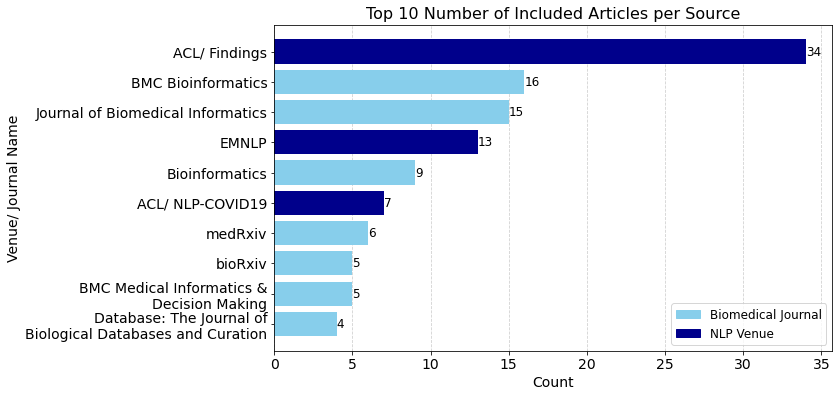

In [768]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming df is your DataFrame

# Count the frequency of each category
category_counts = df.groupby(['journal', 'publication_type']).size()

# Modify the value with "\n" added
category_counts = category_counts.rename("count")
category_counts = category_counts.reset_index()
category_counts['journal'] = category_counts['journal'].replace({
    "Database: The Journal of Biological Databases and Curation": "Database: The Journal of\nBiological Databases and Curation",
    "BMC Medical Informatics & Decision Making": "BMC Medical Informatics &\nDecision Making",
    "Association for Computational Linguistics/ Findings": "ACL/ Findings",
    "Association for Computational Linguistics/ BioNLP": "ACL/ BioNLP",
    "Association for Computational Linguistics/ NLP-COVID19": "ACL/ NLP-COVID19",
    "AMIA Summits on Translational Science Proceedings": "AMIA Summits on Translational\nScience Proceedings",
    "AMIA ... Annual Symposium Proceedings/AMIA Symposium":"AMIA Symposium"
})

# Get the top 10 categories and sort in descending order
top_10_categories = category_counts.groupby(['journal', 'publication_type'])['count'].sum().reset_index()
top_10_categories = top_10_categories.sort_values(by='count', ascending=False).head(10)

# Transpose the DataFrame
top_10_categories = pd.DataFrame(top_10_categories)

# Assign colors based on the publication type
colors = ['skyblue' if pub_type == 'biomedical_journal' else 'darkblue' for pub_type in top_10_categories['publication_type']]

# Reverse the order of colors to correspond with reversed bars
colors = colors[::-1]

# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart with different colors for each publication type
bar_plot = plt.barh(top_10_categories['journal'][::-1], top_10_categories['count'][::-1], color=colors, zorder=2)

# Add labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Venue/ Journal Name', fontsize=14)
plt.title('Top 10 Number of Included Articles per Source', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add count values as annotations
for bar, count in zip(bar_plot, top_10_categories['count'][::-1]):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=12)

# Add horizontal grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

# Create legend handles for each category and place it outside the plot
legend_handles = [Patch(color='skyblue', label='Biomedical Journal'), Patch(color='darkblue', label='NLP Venue')]
plt.legend(handles=legend_handles, fontsize=12, loc='lower right')

plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)

# Save the plot to a local folder
plt.savefig('viz/top_10_journals_count_2024.png', bbox_inches='tight')

# Display the chart
plt.show()


In [520]:
top_10_categories

,journal,publication_type,count
1,ACL/ Findings,nlp_venue,34
11,BMC Bioinformatics,biomedical_journal,16
41,Journal of Biomedical Informatics,biomedical_journal,15
28,EMNLP,nlp_venue,13
18,Bioinformatics,biomedical_journal,9
2,ACL/ NLP-COVID19,nlp_venue,7
70,medRxiv,biomedical_journal,6
69,bioRxiv,biomedical_journal,5
12,BMC Medical Informatics &\nDecision Making,biomedical_journal,5
27,Database: The Journal of\nBiological Databases...,biomedical_journal,4


## Target DB and Data Type

In [533]:
df = pd.concat([df_included, df_acl_included, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

df.head(2)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Unnamed: 32
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,partially,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1.0,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11.0,NaN,English,1929-0748,e29398,10.0,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,Python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",NaN,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10.0,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16.0,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN


In [534]:
df.shape

(199, 73)

In [535]:
df['Target database'] = df['Target database'].replace("PubMed articles (also financial, lifestyle, recreation, technology, writing and science data)", "PubMed")

# Create a new column to store the flattened data types
df['Flattened_Data_Types'] = df['Target database'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')

# Replace "PubMed articles" with "PubMed"
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("PubMed articles", "PubMed")

df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Embase", "EMBASE")


# Replace "electronic health records" and "Electronic Health Records" with "Clinical texts"
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace(["clinical notes", "electronic health records", "Electronic Health Records"], "Clinical texts")

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

PubMed                                                          98
Clinical texts                                                  32
MEDLINE                                                         20
Social media                                                    12
CORD-19                                                         10
EMBASE                                                           8
Wikipedia                                                        6
DrugBank database                                                5
ChatGPT                                                          3
ClinicalTrials.gov                                               3
arXiv                                                            3
Web of Science                                                   3
Cochrane                                                         3
time-series                                                      2
Structured Product Labels (SPL)                               

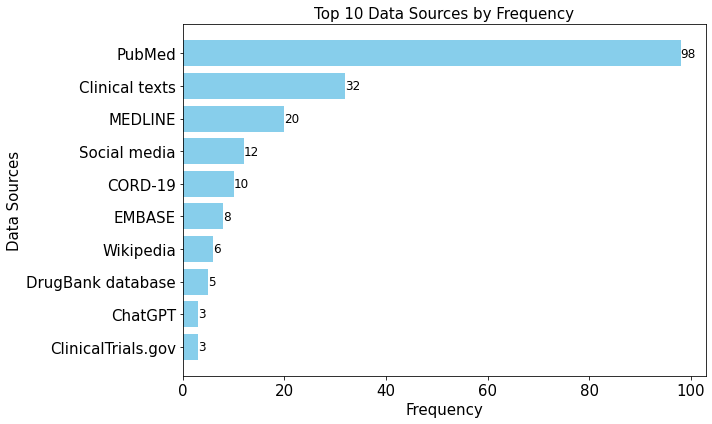

In [536]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_exploded is your DataFrame with the exploded data types and data_type_counts is the counts
# If not, you can adjust accordingly based on your DataFrame structure

# Get the top 10 data types and their counts, in descending order
top_10_data_types = data_type_counts.nlargest(10)

# Reverse the order
top_10_data_types = top_10_data_types[::-1]

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_data_types.index, top_10_data_types, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Data Sources', fontsize=15)
plt.title('Top 10 Data Sources by Frequency', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/top_10_data_types_frequency_2024.png')

# Display the chart
plt.show()


In [541]:
df = pd.concat([df_included, df_acl_included, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

#df.head(2)

In [550]:
# Create a new column to store the flattened data types
df['Flattened_Data_Types'] = df['Data type'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.title()
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Abstract", "Abstracts")

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

Abstracts                                                                                 111
Full-Text                                                                                  46
Clinical Notes                                                                             18
Patient Discharge Summaries                                                                 8
Title                                                                                       7
Systematic Reviews                                                                          6
Twitter                                                                                     6
Electronic Health Records                                                                   6
Sentences                                                                                   6
Wiki Articles                                                                               4
Transcription                                               

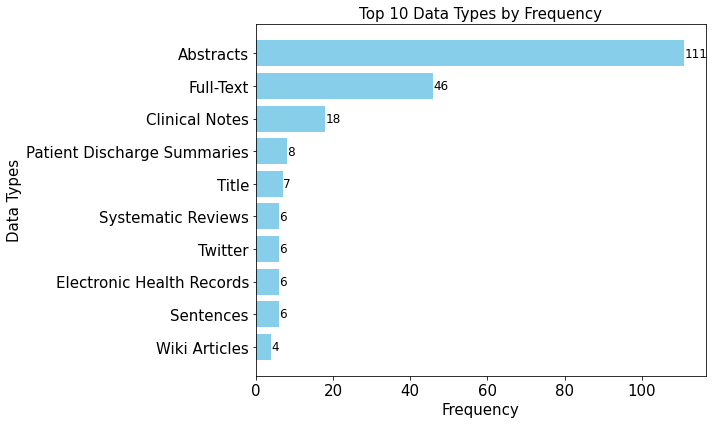

In [551]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_exploded is your DataFrame with the exploded data types and data_type_counts is the counts
# If not, you can adjust accordingly based on your DataFrame structure

# Get the top 10 data types and their counts, in descending order
top_10_data_types = data_type_counts.nlargest(10)

# Reverse the order
top_10_data_types = top_10_data_types[::-1]

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_data_types.index, top_10_data_types, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Data Types', fontsize=15)
plt.title('Top 10 Data Types by Frequency', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/top_10_data_types_details_frequency_2024.png')

# Display the chart
plt.show()


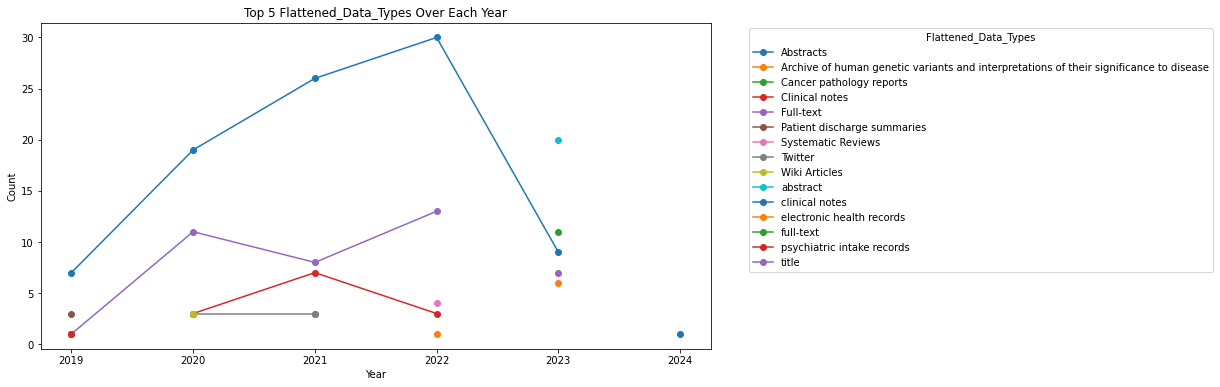

In [548]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df_exploded
# Group by 'year' and count the occurrences of each 'Flattened_Data_Types' value
grouped = df_exploded.groupby(['year', 'Flattened_Data_Types']).size().reset_index(name='count')

# Sort the data by year and count in descending order
grouped = grouped.sort_values(by=['year', 'count'], ascending=[True, False])

# Get the top 5 most frequent values for each year
top5_values = grouped.groupby('year').head(5)

# Create a pivot table to make it easier for plotting
pivot_table = top5_values.pivot(index='year', columns='Flattened_Data_Types', values='count')

# Plot the data in a line chart
pivot_table.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 5 Flattened_Data_Types Over Each Year')
plt.legend(title='Flattened_Data_Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [552]:
df_exploded.groupby(['Flattened_Data_Types', 'Fine-tuning corpus data/task']).size().reset_index(name='count')


,Flattened_Data_Types,Fine-tuning corpus data/task,count
0,Abstracts,2010 i2b2/VA; GAD; EU-ADR,1
1,Abstracts,"6000 annotated relations from SemMedDB, 300 cu...",1
2,Abstracts,ACL-ARC; SCIERC; CHEMPROT; RCT,1
3,Abstracts,ADE-Corpus-V2 dataset; Custom-annotated PubMed...,1
4,Abstracts,AGAC corpus; BC5CDR; NCBI-disease; BC2GM; 2010...,1
5,Abstracts,AGAC; Custom-annotated data,1
6,Abstracts,BBBP; SIDER; TOX21; HIV datasets; chemical rea...,1
7,Abstracts,BC2GM; BC4CHEMD; BC5CDR-chem; BC5CDR-disease; ...,1
8,Abstracts,BC2GM; BC4CHEMD; BC5CDR; NCBI-disease,1
9,Abstracts,BC2GM; JNLPBA; BC4CHEMD; BC5CDR-chem; BC5CDR-d...,1


## Fine-tuning corpus data/task

In [563]:
df = pd.concat([df_included, df_acl_included, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

df.head(2)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Unnamed: 32
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,partially,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1.0,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11.0,NaN,English,1929-0748,e29398,10.0,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,Python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",NaN,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10.0,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16.0,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN


In [560]:
df = df_2024_included.copy()

In [564]:
# Create a new column to store the flattened data types
df['Flattened_Data_Types'] = df['Fine-tuning corpus data/task'].str.split('; ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.strip()
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("BC5CDR-disease", "BC5CDR")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("BC5CDR-chem", "BC5CDR")


# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
data_type_counts

BC5CDR                                                                                                                                                                                             32
NCBI-disease                                                                                                                                                                                       19
Self-collected data                                                                                                                                                                                19
Custom-annotated PubMed data                                                                                                                                                                       13
BC2GM                                                                                                                                                                                              10
DDIExtract

### Custom Datasets

In [565]:
df_exploded.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Unnamed: 32,Flattened_Data_Types
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,partially,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1.0,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11.0,NaN,English,1929-0748,e29398,10.0,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,Custom-annotated PubMed data
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,Python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",NaN,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10.0,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16.0,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,HPRD PPI
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text min

In [566]:
selected_rows = df_exploded[df_exploded["Flattened_Data_Types"].str.contains("custom", case=False, na=False)]
custom_datasets = selected_rows[['title', 'Domain of automated approach', 'journal', 'Data type', 'Target application', 'year', 'Data used availability', 'Flattened_Data_Types', 'publication_type', 'New annotations']]
custom_datasets[['Biomedical Domain', 'Domain Details']] = custom_datasets['Domain of automated approach'].str.split(':', 1, expand=True)
custom_datasets[['Biomedical Domain Main', 'Biomedical Domain Additional']] = custom_datasets['Biomedical Domain'].str.split('/', 1, expand=True)
selected_rows.shape, custom_datasets.shape

/Users/donevas/opt/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



((57, 74), (57, 14))

In [567]:
custom_datasets_classification = custom_datasets[custom_datasets["Target application"].str.contains("classification", case=False, na=False)]
custom_datasets_classification.sort_values(by="Flattened_Data_Types")

,title,Domain of automated approach,journal,Data type,Target application,year,Data used availability,Flattened_Data_Types,publication_type,New annotations,Biomedical Domain,Domain Details,Biomedical Domain Main,Biomedical Domain Additional
103,A context-based framework for modeling the rol...,Biomedical Literature Curation: categorizing t...,EMNLP,Abstracts,Text Classification,2019,yes,"Custom-annotated ARC, NeurIPS, PubMed dataset",nlp_venue,full-text annotations for the resource role ty...,Biomedical Literature Curation,categorizing the online resources and analyzi...,Biomedical Literature Curation,None
74,Automating Quality Assessment of Medical Evide...,Evidence-Based Medicine/ Quality of Evidence A...,Journal of Medical Internet Research,Systematic Reviews,Text Classification,2023,yes,Custom-annotated Cochrane Reviews,biomedical_journal,"quality of evidence (RoB, imprecision, inconsi...",Evidence-Based Medicine/ Quality of Evidence A...,Automating Quality Assessment of Medical Evid...,Evidence-Based Medicine,Quality of Evidence Assessment/ Systematic Re...
102,CORA: A Deep Active Learning Covid-19 Relevanc...,Biomedical Literature Curation/ Covid-19: dist...,Association for Computational Linguistics/ NLP...,"Abstracts, Full-text",Text Classification,2020,yes,Custom-annotated Elsevier data,nlp_venue,relevance annotation for the reserch question ...,Biomedical Literature Curation/ Covid-19,distinguish the relevant from the non-relevan...,Biomedical Literature Curation,Covid-19
38,Bat4RCT: A suite of benchmark data and baselin...,Biomedical Literature Curation/ RCT Articles: ...,PLoS ONE [Electronic Resource],Abstracts,Text Classification,2023,yes,Custom-annotated MEDLINE articles,biomedical_journal,RCT - yes or no,Biomedical Literature Curation/ RCT Articles,Classification if a study is a randomized con...,Biomedical Literature Curation,RCT Articles
0,A Deep Learning Approach to Refine the Identif...,Literature Screening/ Methodological Quality: ...,JMIR Research Protocols,Abstracts,Text Classification,2021,partially,Custom-annotated PubMed data,biomedical_journal,"Article type: original study, systematic revie...",Literature Screening/ Methodological Quality,improve the precision of retrieving high-qual...,Literature Screening,Methodological Quality
109,Detecting causal language use in science findings,Evidence-Based Medicine: prediction model to a...,EMNLP,Abstracts,Text Classification,2019,yes,Custom-annotated PubMed data,nlp_venue,annotated sentence with on of the casual relat...,Evidence-Based Medicine,prediction model to automatically identify co...,Evidence-Based Medicine,None
77,"Clinical study type classification, validation...",Literature Screening/ Study Type/ Biomedical L...,medRxiv,Abstracts,Text Classification,2022,no,Custom-annotated PubMed data,biomedical_journal,Abstracts were assigned one of the following s...,Literature Screening/ Study Type/ Biomedical L...,Classify PubMed abstracts as randomized contr...,Literature Screening,Study Type/ Biomedical Literature Curation/ S...
21,An automated approach to identify scientific p...,Pharma/ Pharmacokinetics: Providing a centrali...,Wellcome Open Research,Abstracts,Text Classification,2021,yes,Custom-annotated PubMed data,biomedical_journal,Pharmacokinetics - papers that contain in vivo...,Pharma/ Pharmacokinetics,Providing a centralized repository for Pharma...,Pharma,Pharmacokinetics
12,The Classification of Short Scientific Texts U...,Literature Screening/ Systematic Reviews/ Neur...,Studies in Health Technology & Informatics,Abstracts,Text Classification,2021,NaN,Custom-annotated PubMed data,biomedical_journal,Relevant or not for a systematic review in art...,Literature Screening/ Systematic Reviews/ Neur...,Classification of Short Scientific Texts to i...,Literature Screening,Systematic Reviews/ Neurosurgery
54,Towards Automated Screening of Literature on A...,Literature Screening/ Systematic Reviews/ Nurs...,Studies in Health Technology & Informatics,Abstr

In [32]:
custom_datasets['Target application'].value_counts()


Text Classification             15
Information Extraction           8
Information Retrieval            8
Named Entity Recognition         5
Entity Normalization/Linking     3
Text Summarization               2
Knowledge Graph                  2
Similarity Clustering            1
Machine Reading Coprehension     1
Fact Verification                1
Multi-Domain                     1
Name: Target application, dtype: int64

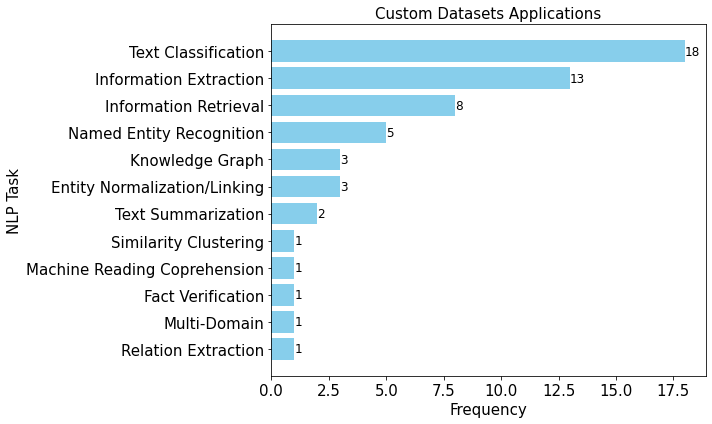

In [569]:
# Assuming df_exploded is your DataFrame with the exploded data types and data_type_counts is the counts
# If not, you can adjust accordingly based on your DataFrame structure

# Get the top 10 data types and their counts, in descending order
top_10_data_types = custom_datasets['Target application'].value_counts()

# Reverse the order
top_10_data_types = top_10_data_types[::-1]

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_data_types.index, top_10_data_types, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('NLP Task', fontsize=15)
plt.title('Custom Datasets Applications', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/custom_dataset_nlp_task_2024.png')

# Display the chart
plt.show()

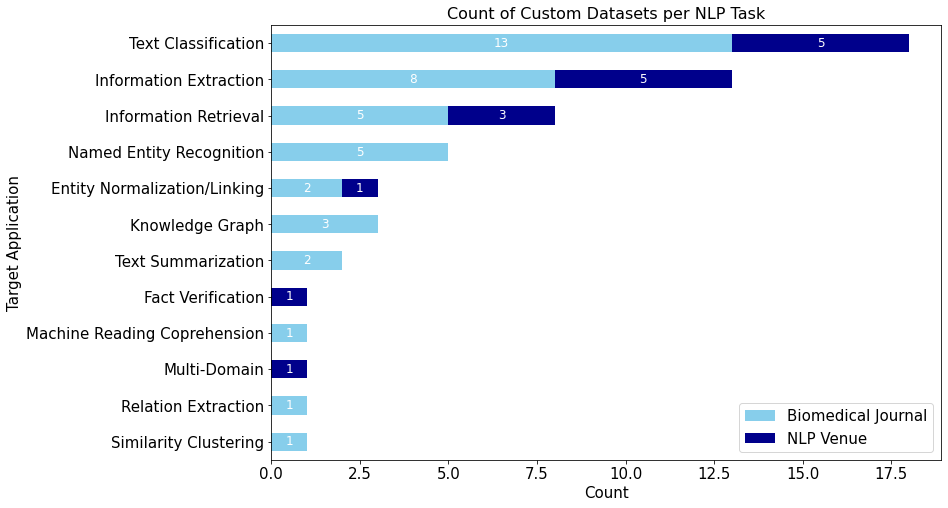

In [570]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming custom_datasets is defined and loaded
# Count the frequency of each category
category_counts = custom_datasets.groupby(['Target application', 'publication_type']).size()
category_counts = category_counts.rename("count")
category_counts = category_counts.reset_index()

# Pivot the data for a stacked bar chart
pivoted_data = category_counts.pivot(index='Target application', columns='publication_type', values='count')

# Fill NaN with 0 for stacking
pivoted_data = pivoted_data.fillna(0)

# Sort by the total count of each category
pivoted_data['total'] = pivoted_data.sum(axis=1)
pivoted_data = pivoted_data.sort_values('total', ascending=False)

# Store the sorted target application names for later use
sorted_target_applications = pivoted_data.index.tolist()

# Drop the total column used for sorting
pivoted_data = pivoted_data.drop(columns='total')

# Create a larger figure
plt.figure(figsize=(12, 8))

# Plotting stacked horizontal bars
bar_plot = pivoted_data.plot(kind='barh', stacked=True, color=['skyblue', 'darkblue'], ax=plt.gca())

# Reverse the order of the y-axis to match the sorted categories
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Count', fontsize=15)
plt.ylabel('Target Application', fontsize=15)
plt.title('Count of Custom Datasets per NLP Task', fontsize=16)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

# Add count values as annotations in the center of each bar segment
for i, bar in enumerate(bar_plot.containers):
    for rect in bar:
        # Calculate width and center position for the annotation
        width = rect.get_width()
        center = rect.get_x() + width / 2
        if width > 0:  # Only annotate non-zero values
            plt.text(center, rect.get_y() + rect.get_height() / 2, int(width), ha='center', va='center', color='white', fontsize=12)

# Add color legend
plt.legend(['Biomedical Journal', 'NLP Venue'], fontsize=15)

# Save and show the plot
plt.savefig('viz/custom_dataset_nlp_task_stacked_2024.png', bbox_inches='tight')
plt.show()


In [571]:
custom_datasets['Data type'].value_counts()


Abstracts                                                                                                                       23
Abstracts, Full-text                                                                                                             6
Abstracts, Archive of human genetic variants and interpretations of their significance to disease, Disease genomics platform     2
Full-text                                                                                                                        2
Full-text, Systematic Reviews                                                                                                    2
abstract, full-text                                                                                                              2
clinical notes                                                                                                                   2
Twitter, Wiki Articles                                                             

In [572]:
custom_datasets['Biomedical Domain Main'].value_counts()


Literature-Based Discovery        16
General biomedical text mining    13
Literature Screening               8
Evidence-Based Medicine            6
Biomedical Literature Curation     6
Media for Health Care              5
Pharma                             1
Clinical                           1
Biological Functions               1
Name: Biomedical Domain Main, dtype: int64

In [573]:
custom_datasets['publication_type'].value_counts()


biomedical_journal    41
nlp_venue             16
Name: publication_type, dtype: int64

In [574]:
41/bio_papers_count, 16/nlp_papers_count

(0.4606741573033708, 0.3137254901960784)

In [576]:
custom_datasets['Data used availability'].value_counts()


yes          28
no           10
partially     3
Name: Data used availability, dtype: int64

In [577]:
len(custom_datasets_classification)

18

In [578]:
custom_datasets_retrieval = custom_datasets[custom_datasets["Target application"].str.contains("retrieval", case=False, na=False)]
custom_datasets_retrieval.sort_values(by="Flattened_Data_Types")

,title,Domain of automated approach,journal,Data type,Target application,year,Data used availability,Flattened_Data_Types,publication_type,New annotations,Biomedical Domain,Domain Details,Biomedical Domain Main,Biomedical Domain Additional
116,Self-supervised context-aware COVID-19 documen...,Literature-Based Discovery/ Covid-19: selfsupe...,Association for Computational Linguistics/ NLP...,"Abstracts, Full-text",Information Retrieval,2020,yes,Custom-annotated CORD-19 (PubMed) with SIO lin...,nlp_venue,samples consist of sentences and their\ntarget...,Literature-Based Discovery/ Covid-19,selfsupervised grounding of Covid-related med...,Literature-Based Discovery,Covid-19
45,pubmedKB: an interactive web server for explor...,Literature-Based Discovery: Search engine for ...,Nucleic Acids Research,"Abstracts, Archive of human genetic variants a...",Information Retrieval,2022,no,Custom-annotated ClinVar abstracts,biomedical_journal,ClinVar: sentence-level triplet of (genetic Va...,Literature-Based Discovery,Search engine for retrieving and interpreting...,Literature-Based Discovery,None
45,pubmedKB: an interactive web server for explor...,Literature-Based Discovery: Search engine for ...,Nucleic Acids Research,"Abstracts, Archive of human genetic variants a...",Information Retrieval,2022,no,Custom-annotated DisGeNET articles,biomedical_journal,ClinVar: sentence-level triplet of (genetic Va...,Literature-Based Discovery,Search engine for retrieving and interpreting...,Literature-Based Discovery,None
9,LitCovid: an open database of COVID-19 literature,Literature-Based Discovery/ Covid-19: Informat...,Nucleic Acids Research,Abstracts,Information Retrieval,2021,yes,Custom-annotated PubMed data,biomedical_journal,"COVID-19 relevance, topic, geolocation and dru...",Literature-Based Discovery/ Covid-19,Information resource for the\nCOVID-19 litera...,Literature-Based Discovery,Covid-19
120,Transitioning from benchmarks to a real-world ...,Literature-Based Discovery: illustrate throug...,Association for Computational Linguistics/ Fin...,Abstracts,Information Retrieval,2023,no,Custom-annotated PubMed data,nlp_venue,a practical use case simulating a search for V...,Literature-Based Discovery,illustrate through a real-world zero-shot te...,Literature-Based Discovery,None
8,LitCovid in 2022: an information resource for ...,Literature-Based Discovery/ Covid-19: Informat...,Nucleic Acids Research,Abstracts,Information Retrieval,2023,yes,Custom-annotated PubMed dataset,biomedical_journal,Vaccines recognition and normalization dataset...,Literature-Based Discovery/ Covid-19,Information resource for the\nCOVID-19 litera...,Literature-Based Discovery,Covid-19
53,LiSA: an assisted literature search pipeline f...,Literature-Based Discovery/ Pharma/ Adverse-Dr...,BMC Medical Informatics & Decision Making,"Abstracts, Full-text, Sentences",Information Retrieval,2022,partially,Custom-annotated PubMed sentences,biomedical_journal,sentences labeled for three categories based o...,Literature-Based Discovery/ Pharma/ Adverse-Dr...,automatically identifying relevant publicatio...,Literature-Based Discovery,Pharma/ Adverse-Drug-Event
92,Querying across genres for medical claims in news,Media for Health Care/ Health News Verificatio...,EMNLP,"Medical news websites, Abstracts",Information Retrieval,2020,yes,Custom-annotated news-PubMed publications dataset,nlp_venue,collected claims from news paired with researc...,Media for Health Care/ Health News Verification,ﬁnd the research publication that supports th...,Media for Health Care,Health News Verification


In [579]:
custom_datasets_extraction = custom_datasets[custom_datasets["Target application"].str.contains("extraction", case=False, na=False)]
custom_datasets_extraction.sort_values(by="Flattened_Data_Types")


,title,Domain of automated approach,journal,Data type,Target application,year,Data used availability,Flattened_Data_Types,publication_type,New annotations,Biomedical Domain,Domain Details,Biomedical Domain Main,Biomedical Domain Additional
177,Extracting social determinants of health from ...,General biomedical text mining: automatic meth...,Journal of the American Medical Informatics As...,clinical notes,Information Extraction,2023,NaN,2 Custom-annotated data,biomedical_journal,NaN,General biomedical text mining,automatic methods to extract and classify pat...,General biomedical text mining,None
105,Evidence-based fact-checking of health-related...,Media for Health Care/ Fact Checking: Evidence...,Association for Computational Linguistics/ Fin...,Abstracts,Information Extraction,2021,yes,Custom-annotated COVID-19 related claims Healt...,nlp_venue,claims retrieved from the web; annotated evid...,Media for Health Care/ Fact Checking,Evidence-based Fact-Checking of Health-relate...,Media for Health Care,Fact Checking
59,Understanding Clinical Trial Reports: Extracti...,Literature-Based Discovery: Clinical eveidence...,AMIA Summits on Translational Science Proceedings,Full-text,Information Extraction,2021,no,Custom-annotated EBM-NLP abstracts,biomedical_journal,"ICO (intervention, comparator, outcome) elemen...",Literature-Based Discovery,"Clinical eveidence extraction (NER), i.e. int...",Literature-Based Discovery,None
94,Fine-grained information extraction from biome...,Literature-Based Discovery: extract scientiﬁc ...,Association for Computational Linguistics,"Abstracts, Full-text",Information Extraction,2021,yes,Custom-annotated PubMed and PMC data,nlp_venue,covid-19 papers annotated for fine-grained ent...,Literature-Based Discovery,extract scientiﬁc entities and events from\nE...,Literature-Based Discovery,None
35,EvidenceMap: a three-level knowledge represent...,Evidence-Based Medicine/ PICO: Automated evide...,Journal of the American Medical Informatics As...,Abstracts,Information Extraction,2023,yes,Custom-annotated PubMed data,biomedical_journal,PICO elements and their dependencies in RCT ar...,Evidence-Based Medicine/ PICO,Automated evidence extraction from randomized...,Evidence-Based Medicine,PICO
144,Leveraging pre-trained language models for min...,Evidence-Based Medicine: extract microbe-disea...,BMC Bioinformatics,sentences,Information Extraction,2023,NaN,Custom-annotated data,biomedical_journal,NaN,Evidence-Based Medicine,extract microbe-disease relationships from bi...,Evidence-Based Medicine,None
155,Algorithmic identification of treatment-emerge...,Clinical: identify serious adverse events (SAE...,medRxiv,clinical notes,Information Extraction,2023,NaN,Custom-annotated data,biomedical_journal,NaN,Clinical,identify serious adverse events (SAEs) occurr...,Clinical,None
167,SCREENER: Streamlined collaborative learning o...,General biomedical text mining: propose a mode...,Plos one,"abstract, full-text",Information Extraction,2023,NaN,Custom-annotated data,biomedical_journal,NaN,General biomedical text mining,propose a model that learns the document-leve...,General biomedical text mining,None
168,RelCurator: a text mining-based curation syste...,General biomedical text mining: analyzes the t...,Genes & Genomics,"title, abstract",Relation Extraction,2023,NaN,Custom-annotated data,biomedical_journal,NaN,General biomedical text mining,analyzes the title and abstract of PubMed art...,General biomedical text mining,None
171,FooDis: A food-disease relation mining pipeline,General biomedical text mining: mine abstracts...,Artificial intelligence in medicine,abstract,Information Extraction,2023,NaN,Custom-annotated data,biomedical_journal,NaN,General biomedical text mining,mine abstracts of biomedical scientific paper...,General biomedical text mining,None


In [580]:
sorted_dataframe = custom_datasets_classification.sort_values(by="Flattened_Data_Types")

# Print the complete text content of "New annotations" column for the first row
print(sorted_dataframe['New annotations'].iloc[9])


if topic is artificial intelligence in nursing - relevant, else not


In [581]:
custom_datasets['Flattened_Data_Types'].value_counts()

Custom-annotated PubMed data                                                                                         13
Custom-annotated data                                                                                                 9
Custom-annotated Elsevier data                                                                                        1
Custom-annotated TCM-related abstracts                                                                                1
Custom-annotated news-PubMed publications dataset                                                                     1
Custom-annotated PubMed and PMC data                                                                                  1
Custom-anotated BioCFE                                                                                                1
custom-annotated Grant-SP and Grant-RE                                                                                1
custom-annotated transcripts of real and

## Biomedical Domains

In [583]:
df = pd.concat([df_included, df_acl_included, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

In [584]:
df[['Biomedical Domain', 'Domain Details']] = df['Domain of automated approach'].str.split(':', 1, expand=True)
replace_values = {
    'Literature-Based Discovery': 'Knowledge Management/Literature-Based Discovery',
    'Literature Screening': 'Knowledge Management/Literature Screening',
    'Biomedical Literature Curation': 'Knowledge Management/Literature Curation'
}
df['Biomedical Domain'] = df['Biomedical Domain'].replace(replace_values, regex=True)

In [585]:
df[['Biomedical Domain Level 1', 'Biomedical Domain Level 2']] = df['Biomedical Domain'].str.split('/', 1, expand=True)
df[['Biomedical Domain Level 2', 'Biomedical Domain Level 3']] = df['Biomedical Domain Level 2'].str.split('/', 1, expand=True)

In [586]:
df[['Biomedical Domain', 'Biomedical Domain Level 1', 'Biomedical Domain Level 2', 'Biomedical Domain Level 3']] 

,Biomedical Domain,Biomedical Domain Level 1,Biomedical Domain Level 2,Biomedical Domain Level 3
0,Knowledge Management/Literature Screening/ Met...,Knowledge Management,Literature Screening,Methodological Quality
1,General biomedical text mining/ Genomics,General biomedical text mining,Genomics,None
2,Knowledge Management/Literature Screening/ Com...,Knowledge Management,Literature Screening,Combination of Selection Criteria/ Knowledge ...
3,Pharma/ Drug-Drug Interaction,Pharma,Drug-Drug Interaction,None
4,Knowledge Management/Literature Screening/ Sys...,Knowledge Management,Literature Screening,Systematic Reviews/ Moxibustion for improving...
5,General biomedical text mining,General biomedical text mining,None,None
6,General biomedical text mining,General biomedical text mining,None,None
7,Knowledge Management/Literature Screening/ PIC...,Knowledge Management,Literature Screening,PICO Recognition/ Knowledge Management/Liter...
8,Knowledge Management/Literature-Based Discover...,Knowledge Management,Literature-Based Discovery,Covid-19
9,Knowledge Management/Literature-Based Discover...,Knowledge Management,Literature-Based Discovery,Covid-19


In [587]:
import textwrap

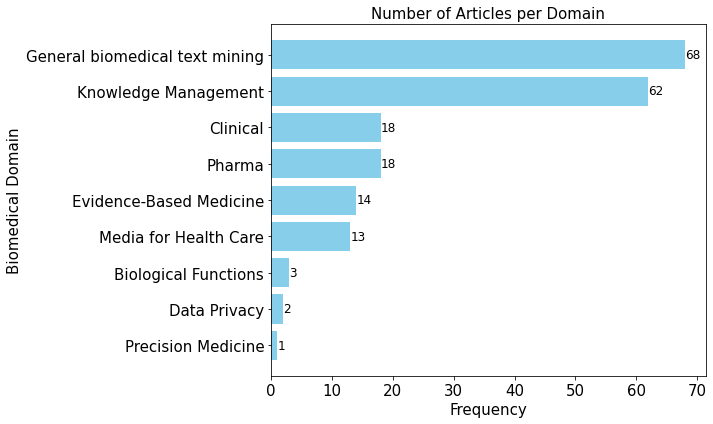

In [588]:
# Count the frequency of each category
#df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("General biomedical text mining", "General biomedical \ntext mining")
#df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("Biomedicla Literature Curation", "Biomedicla Literature \nCuration")
#df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("Literature-Based Discovery", "Literature-Based \nDiscovery")

category_counts = df['Biomedical Domain Level 1'].value_counts()
top_n = 11

# Get the top 10 categories
top_10_categories = category_counts.head(top_n)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()


# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_categories.index, top_10_categories, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Biomedical Domain', fontsize=15)
plt.title('Number of Articles per Domain', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/number_of_papers_domain_count_2024.png'.format(top_n))

# Display the chart
plt.show()



In [589]:
sum(category_counts)

199

In [595]:
filtered_df = df[(df['Biomedical Domain Level 1'] == 'Knowledge Management') | (df['Biomedical Domain Level 1'] == 'Pharma') | (df['Biomedical Domain Level 1'] == 'Media for Health Care')| (df['Biomedical Domain Level 1'] == 'Clinical')]
filtered_df = filtered_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
filtered_df['Biomedical Domain Level 2'].fillna("missing", inplace=True)

In [596]:
filtered_df[['doi','Biomedical Domain Level 1', 'Biomedical Domain Level 2']]

,doi,Biomedical Domain Level 1,Biomedical Domain Level 2
0,10.2196/29398,Knowledge Management,Literature Screening
2,10.1016/j.jbi.2020.103578,Knowledge Management,Literature Screening
3,10.1093/bioinformatics/btac754,Pharma,Drug-Drug Interaction
4,10.1186/s13643-021-01763-w,Knowledge Management,Literature Screening
7,10.1186/s12911-019-0992-8,Knowledge Management,Literature Screening
8,10.1093/nar/gkac1005,Knowledge Management,Literature-Based Discovery
9,10.1093/nar/gkaa952,Knowledge Management,Literature-Based Discovery
10,10.1093/database/baz116,Pharma,Chemical-Disease Interaction
12,10.3233/SHTI210125,Knowledge Management,Literature Screening
13,10.3390/ijerph19105893,Knowledge Management,Literature-Based Discovery


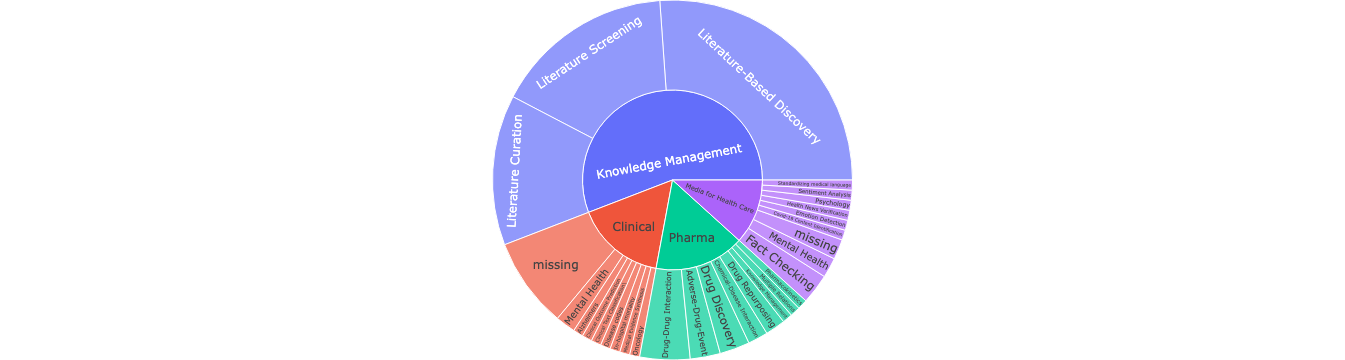

In [597]:
import plotly.express as px

# Create a sunburst chart
fig = px.sunburst(filtered_df, path=['Biomedical Domain Level 1', 'Biomedical Domain Level 2'])

# Update layout for better readability
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

# Show the chart
fig.show()


In [598]:
from collections import defaultdict

category_counts = defaultdict(lambda: defaultdict(int))

# Iterate over the DataFrame rows
for _, row in filtered_df.iterrows():
    # Increment the count of the (Level 1, Level 2) pair
    category_counts[row['Biomedical Domain Level 1']][row['Biomedical Domain Level 2']] += 1

# Convert the defaultdict to a regular dict and sort the subcategories by count, descending
categories = {lvl1: sorted(lvl2.items(), key=lambda item: item[1], reverse=True)
               for lvl1, lvl2 in category_counts.items()}

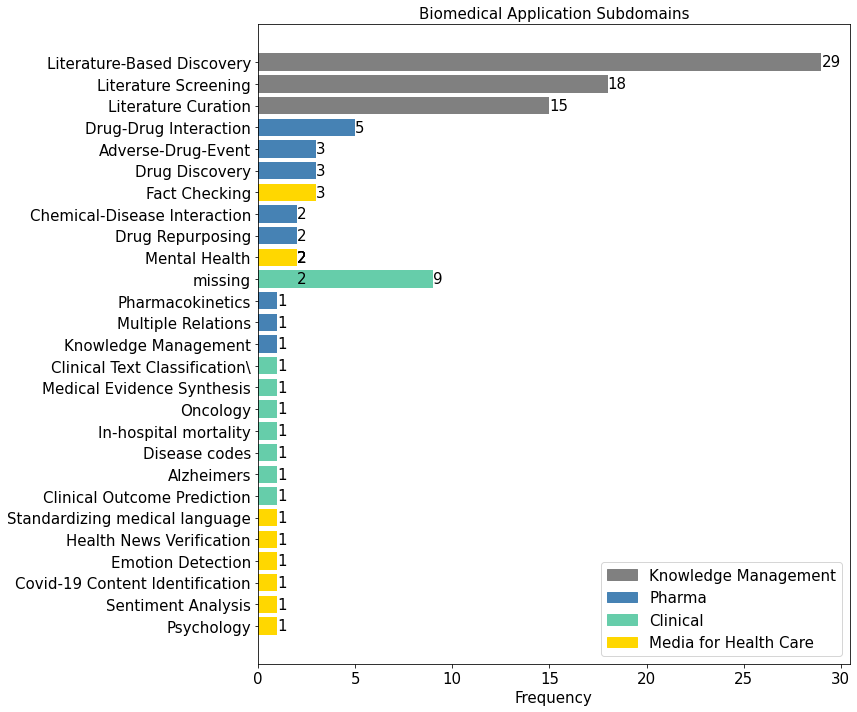

In [599]:
import matplotlib.pyplot as plt

# Define colors for each main category
category_colors = {'Knowledge Management': 'gray', 'Pharma': 'steelblue', 'Clinical': 'mediumaquamarine', 'Media for Health Care': 'gold'}

# Create the figure and the axes with increased figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Combine all subcategories and their values into a single list
all_items = [(subcat, value) for items in categories.values() for subcat, value in items]

# Sort the items by value in ascending order
sorted_items = sorted(all_items, key=lambda x: x[1], reverse=True)

# Loop over the sorted items in reverse order to create the stacked bar chart.
for subcat, value in reversed(sorted_items):
    # Find the category for the current subcategory
    for category, items in categories.items():
        if (subcat, value) in items:
            # Plot the horizontal bar with the corresponding value and color
            bar = ax.barh(subcat, value, color=category_colors[category])
            # Display the value at the end of each bar using the bar width
            bar_width = bar[0].get_width()
            # Use the bar's y-coordinate for text placement
            bar_y = bar[0].get_y() + bar[0].get_height() / 2
            ax.text(bar_width, bar_y, str(value), va='center', color='black', fontsize=15)  # Set the text size to 15

# Set the title of the chart with font size
ax.set_title('Biomedical Application Subdomains', fontsize=15)

# Add a legend for the colors
handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=category) for category, color in category_colors.items()]
ax.legend(handles=handles, loc='lower right', fontsize=15)  # Set the legend font size to 15

# Set the x-axis label
ax.set_xlabel('Frequency', fontsize=15)  # Set the x-axis label and font size

# Show the x-axis labels and title
ax.xaxis.set_visible(True)

# Set the font size for x-axis and y-axis labels
ax.tick_params(axis='both', labelsize=15)

plt.tight_layout()  # Adjust subplot spacing to avoid cutting off labels

plt.savefig('viz/number_of_papers_subdomain_count_2024.png'.format(top_n))

# Show the plot
plt.show()


### Abstracts embeddings

In [600]:
df.head(2)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Unnamed: 32,Biomedical Domain,Domain Details,Biomedical Domain Level 1,Biomedical Domain Level 2,Biomedical Domain Level 3
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,partially,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1.0,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11.0,NaN,English,1929-0748,e29398,10.0,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,Knowledge Management/Literature Screening/ Met...,improve the precision of retrieving high-qual...,Knowledge Management,Literature Screening,Methodological Quality
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,Python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",NaN,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10.0,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16.0,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based

In [601]:
# Find rows where 'abstract' is NaN
nan_rows = df[df['abstract'].isna()]

# Display these rows
print(nan_rows['doi'])

105    10.18653/v1/2021.findings-emnlp.297
106           10.18653/v1/2021.bionlp-1.21
130          10.18653/v1/2022.acl-short.70
140                    10.1093/bib/bbad226
141           10.18653/v1/2023.bionlp-1.54
142              10.48550/arXiv.2205.11342
143       10.18653/v1/2023.findings-acl.24
144             10.1186/s12859-023-05411-z
145                  10.1093/jamia/ocad190
146    10.18653/v1/2023.findings-emnlp.474
147              10.1016/j.jbi.2023.104384
148             10.1186/s12859-023-05439-1
149      10.18653/v1/2023.findings-acl.749
150             10.1186/s13326-023-00292-w
151             10.1186/s13643-023-02353-8
152              10.1101/2023.07.24.550359
153              10.1016/j.jbi.2023.104370
154              10.1101/2023.06.23.546229
155            10.1101/2023.09.06.23295149
156           10.1016/j.ailsci.2023.100078
157             10.3389/fgene.2023.1238140
158      10.18653/v1/2023.findings-acl.263
159             10.3389/fgene.2023.1161047
160        

In [383]:
set(df['Biomedical Domain Level 1'])

{'Biological Functions',
 'Clinical',
 'Data Privacy',
 'Evidence-Based Medicine',
 'General biomedical text mining',
 'Knowledge Management',
 'Media for Health Care',
 'Pharma'}

In [388]:
# Dictionary for mapping
abbreviation_dict = {
    'Biological Functions': 'BioFct',
    'Clinical': 'Clinical',
    'Data Privacy': 'Data Privacy',
    'Evidence-Based Medicine': 'EBM',
    'General biomedical text mining': 'General',
    'Knowledge Management': 'KM',
    'Media for Health Care': 'Media',
    'Pharma': 'Pharma'
}

# Map the abbreviations
df['Biomedical Domain Abbrev'] = df['Biomedical Domain Level 1'].map(abbreviation_dict)

In [359]:
pip install gensim

DEPRECATION: prodigy 1.11.8 has a non-standard dependency specifier srsly>=2.0.0<3.0.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of prodigy or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [385]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donevas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/donevas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


using doc2vec


/Users/donevas/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



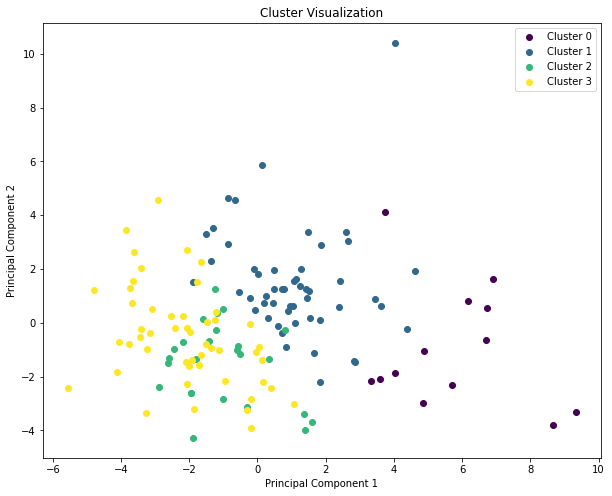

In [386]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 2: Preprocess the abstracts (tokenization, lowercase, stop words removal, etc.)
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
embed_model = "doc2vec"

def preprocess_text(text):
    # Remove non-alphanumeric characters
    if not text:
        print("Issue with the current abstract")
    #print(text)
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercase conversion
    tokens = [token.lower() for token in tokens]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

df['Preprocessed_Abstract'] = df['abstract'].apply(preprocess_text)

if embed_model == "doc2vec":
    print("using doc2vec")
    # Step 3: Prepare Data for Doc2Vec
    tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(df['Preprocessed_Abstract'])]

    # Step 4: Initialize and Train Doc2Vec Model
    model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

    # Step 5: Vectorize Abstracts using Doc2Vec
    X = np.array([model.infer_vector(doc.words) for doc in tagged_data])
else:
    # Step 3: Vectorize the abstracts
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Step 4: Choose a clustering algorithm (K-means in this example)
num_clusters = 4 # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Step 5: Apply the clustering algorithm
# List of cluster labels
cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
if embed_model == "doc2vec":
    X_pca = pca.fit_transform(X)
else:
    X_pca = pca.fit_transform(X.toarray())

# List of unique cluster labels
unique_clusters = np.unique(cluster_labels)

# List of colors for each cluster label
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Create a larger figure
plt.figure(figsize=(10, 8))

# Scatter plot of PCA-transformed data points with cluster labels as colors
for cluster_label, color in zip(unique_clusters, colors):
    mask = cluster_labels == cluster_label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=color, label=f'Cluster {cluster_label}')

plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('viz/cluster_vis_{}_pca.png'.format(embed_model))  # Change the format and resolution as needed
plt.show()

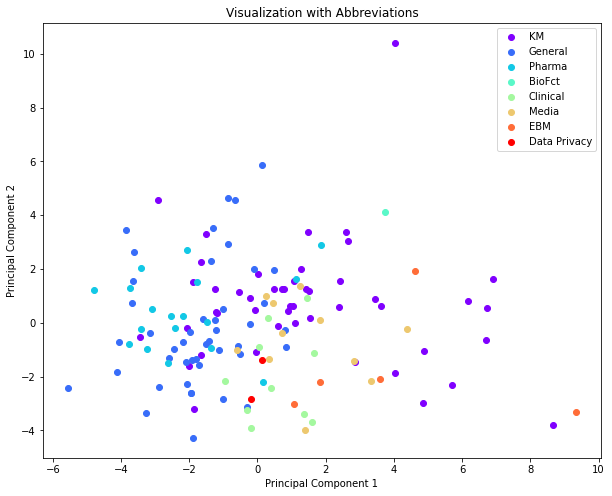

In [390]:
# Get unique abbreviations and assign a unique color to each
unique_abbreviations = df['Biomedical Domain Abbrev'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_abbreviations)))
abbreviation_to_color = dict(zip(unique_abbreviations, colors))

# Create a new column for colors based on abbreviations
df['Color'] = df['Biomedical Domain Abbrev'].map(abbreviation_to_color)

# Plot
plt.figure(figsize=(10, 8))

for abbreviation in unique_abbreviations:
    mask = df['Biomedical Domain Abbrev'] == abbreviation
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=abbreviation_to_color[abbreviation], label=f'{abbreviation}')

plt.title('Visualization with Abbreviations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('viz/abbreviation_vis_{}_pca.png'.format(embed_model))
plt.show()


In [239]:
cluster_labels

array([0, 1, 0, 1, 0, 2, 2, 0, 3, 3, 2, 1, 3, 2, 1, 0, 2, 1, 2, 1, 1, 3,
       3, 2, 1, 0, 1, 2, 3, 3, 2, 3, 1, 2, 2, 0, 2, 3, 3, 0, 3, 1, 2, 3,
       1, 3, 1, 3, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 2, 3, 1, 0, 3, 0, 3, 1,
       1, 3, 1, 2, 3, 1, 2, 1, 0, 2, 3, 0, 2, 0, 3, 3, 3, 1, 3, 1, 2, 3,
       1, 2, 2, 2, 3, 3, 1, 1, 1, 2, 3, 3, 3, 2, 3, 3, 1, 3, 3, 2, 2, 3,
       3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 3, 2, 3, 2, 2, 2, 3,
       3, 2, 2, 2, 3, 2, 3, 2, 2, 1], dtype=int32)

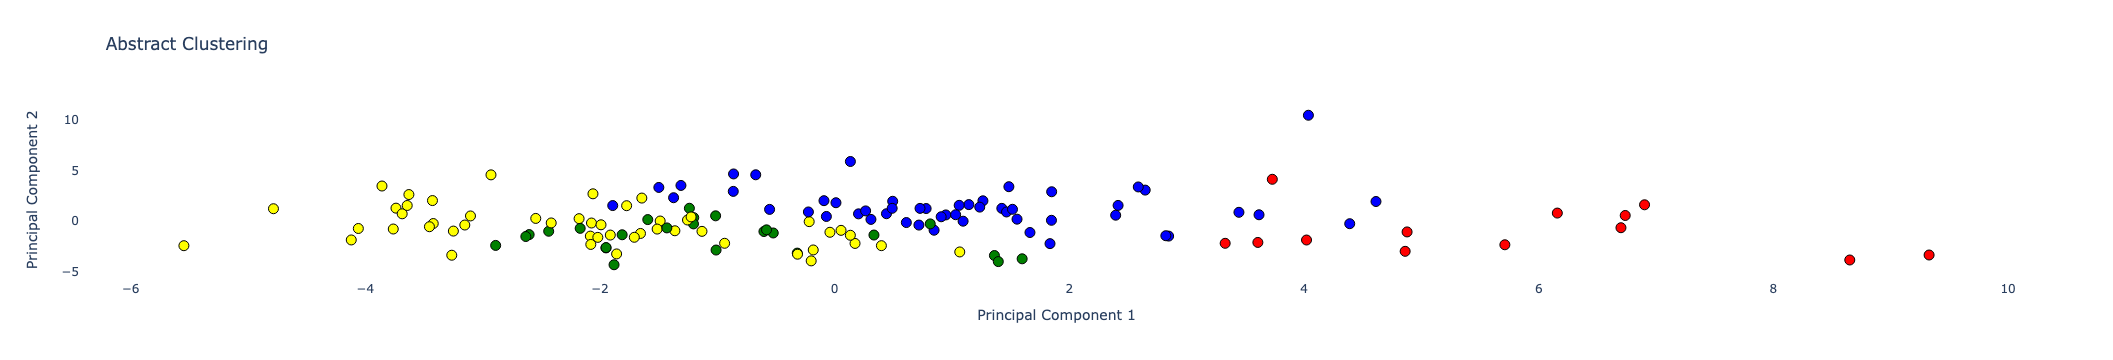

In [394]:
df['Cluster'] = cluster_labels

import plotly.graph_objects as go # Import the graphical object
import plotly.colors as colors


# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'yellow', 'orange', "pink", "black", "grey"]

fig = go.Figure(data=go.Scatter(
    x=X_pca[:, 0], y=X_pca[:, 1],
    mode='markers',
    marker=dict(
        color=[cluster_colors[label] for label in cluster_labels],
        size=10,  # Adjust the marker size here
        line=dict(width=1, color='Black')
    ),
    hovertemplate='<b>Title:</b> %{text}',
    text=df['title']
))


# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)

plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=1000
)

# Show the plot
fig.show()

## Target NLP Task

In [602]:
df = pd.concat([df_included, df_acl_included, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

In [603]:
df['Target application'].value_counts()

Text Classification             53
Information Extraction          27
Relation Extraction             25
Multi-Domain                    19
Named Entity Recognition        17
Information Retrieval           15
Entity Normalization/Linking     9
Knowledge Graph                  7
Other                            5
Text Summarization               5
Similarity Clustering            4
Question Answering               4
Machine Reading Coprehension     3
Fact Verification                2
Systematic Review                2
Explainable AI                   1
Topic Modelling                  1
Name: Target application, dtype: int64

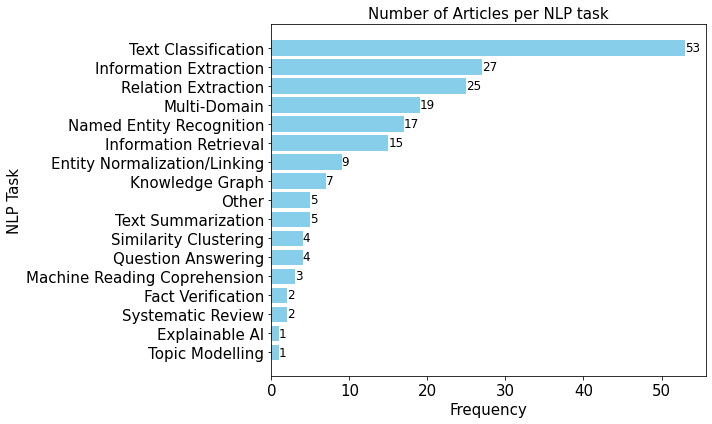

In [604]:
category_counts = df['Target application'].value_counts()
top_n = len(df['Target application'].value_counts()) # interested in all categories

# Get the top 10 categories
top_10_categories = category_counts.head(top_n)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()


# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_categories.index, top_10_categories, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('NLP Task', fontsize=15)
plt.title('Number of Articles per NLP task', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/target_NLP_application_count_2024.png'.format(top_n))

# Display the chart
plt.show()

## LLMs

In [728]:
df = pd.concat([df_included, df_acl_included, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

# Create a new column to store the flattened data types
df['Flattened_Models'] = df['LLM Model'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Models')
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace(r'(?i).*gpt.*', 'GPT', regex=True)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace(r'(?i).*t5.*', 'T5', regex=True)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('Bio+Clinical BERT', 'BioClinicalBERT', regex=False)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('Bio+ClinicalBERT', 'BioClinicalBERT', regex=False)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('BioCinicalBERT', 'BioClinicalBERT', regex=False)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('Sci-BERT uncased version', 'SciBERT', regex=False)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('BioBERT (base and large)', 'BioBERT', regex=False)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('AlBERT', 'ALBERT', regex=False)


# Remove leading and trailing whitespaces from the 'Flattened_Models' column
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.strip()

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Models'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

BERT                                                                                 88
BioBERT                                                                              81
PubMedBERT                                                                           29
SciBERT                                                                              26
GPT                                                                                  19
BlueBERT                                                                             17
RoBERTa                                                                              17
ClinicalBERT                                                                         13
T5                                                                                    8
BioClinicalBERT                                                                       8
ALBERT                                                                                6
DistilBERT                      

In [729]:
df_year_model = df_exploded[["year", "Flattened_Models"]]

# Group by year and model, and count occurrences
year_model_counts = df_year_model.groupby(['year', 'Flattened_Models']).size().reset_index(name='counts')

# For each year, find the top 5 models
top5_per_year = year_model_counts.groupby('year').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)

# Pivot this data for plotting
pivot_data = top5_per_year.pivot(index='year', columns='Flattened_Models', values='counts').fillna(0)
pivot_data.head()

Flattened_Models,BERT,BioBERT,BioClinicalBERT,BlueBERT,ClinicalBERT,GPT,NCBI BERT,PubMedBERT,RoBERTa,SciBERT
year,,,,,,,,,,
2019,10.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020,19.0,14.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,7.0
2021,15.0,24.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0
2022,13.0,19.0,0.0,5.0,0.0,0.0,0.0,10.0,0.0,6.0
2023,31.0,19.0,0.0,0.0,0.0,18.0,0.0,13.0,10.0,0.0


<Figure size 864x576 with 0 Axes>

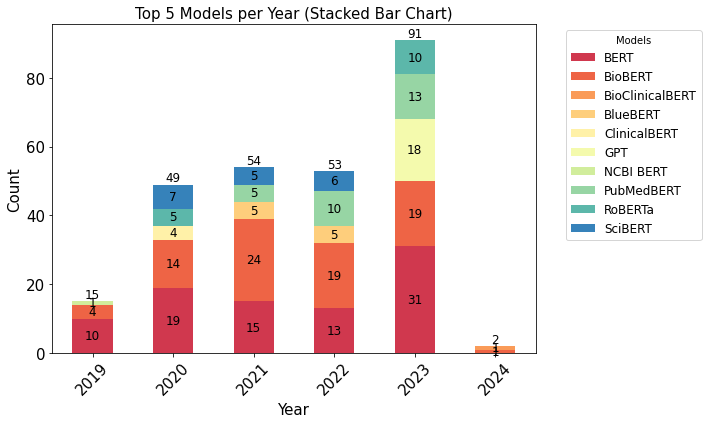

In [730]:
pastel_palette = sns.color_palette("Spectral", len(pivot_data.columns))

plt.figure(figsize=(12, 8))
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=pastel_palette)

# Adding data labels inside the bars
for rect in ax.patches:
    # Find where to place the label
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_x() + rect.get_width() / 2

    # Get the value to label
    value = int(rect.get_height())

    # Only label bars with a value
    if value > 0:
        ax.annotate(value, (x_value, y_value), ha='center', va='center', fontsize=12)

# Adding total label on top of each bar
for i, total in enumerate(pivot_data.sum(axis=1)):
    ax.text(i, total, str(int(total)), ha='center', va='bottom', fontsize=12)

plt.title("Top 5 Models per Year (Stacked Bar Chart)",fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=45)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig('viz/LLM_models_top5_per_year_2024.png'.format(top_n))
plt.show()

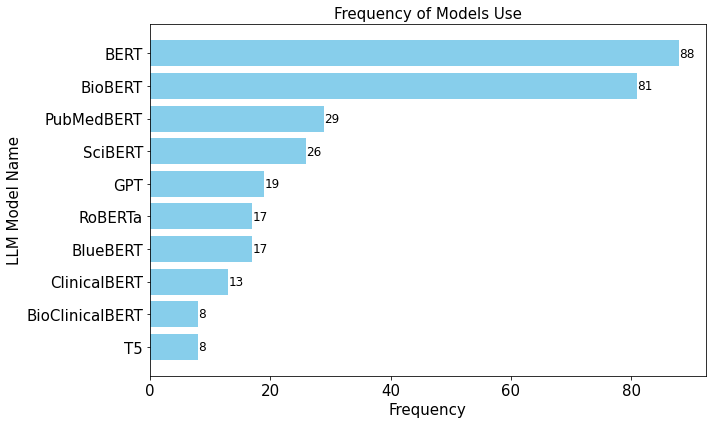

In [731]:
# Get the top 10 categories
top_10_categories = data_type_counts.head(10)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_categories.index, top_10_categories, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('LLM Model Name', fontsize=15)
plt.title('Frequency of Models Use', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/LLM_models_top_10_2024.png'.format(top_n))

# Display the chart
plt.show()

In [732]:
df_year_model_list = df[["year", "Flattened_Models"]]

In [733]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

/var/folders/px/wtj901jn7z9f26xgbys4l7jh0000gp/T/ipykernel_38901/2189380530.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/px/wtj901jn7z9f26xgbys4l7jh0000gp/T/ipykernel_38901/2189380530.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



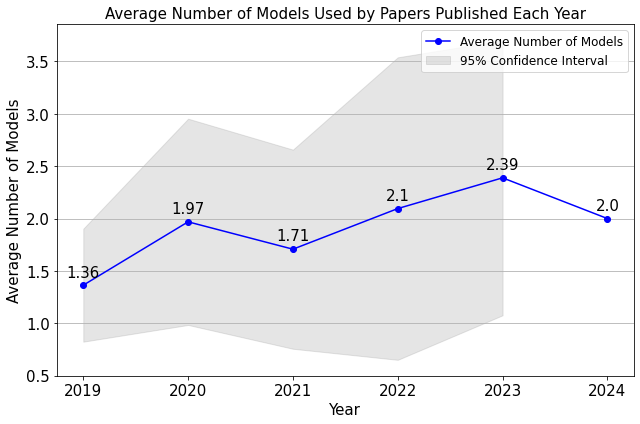

In [734]:
# Convert the "year" column to integers
df_year_model_list['year'] = df_year_model_list['year'].astype(int)

# Calculate the number of models used by each paper
df_year_model_list['Num_Models_Used'] = df_year_model_list['Flattened_Models'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calculate the average number of models for each year
yearly_avg = df_year_model_list.groupby('year')['Num_Models_Used'].mean()

# Calculate the confidence intervals for the averages
yearly_std = df_year_model_list.groupby('year')['Num_Models_Used'].std()
confidence_interval = stats.norm.interval(0.95, loc=yearly_avg, scale=yearly_std / np.sqrt(df_year_model_list['year'].nunique()))

# Create a DataFrame for the results
result_df = pd.DataFrame({
    "Year": yearly_avg.index,
    "Average_Num_Models": yearly_avg.values,
    "Lower_CI": confidence_interval[0],
    "Upper_CI": confidence_interval[1]
})

# Create a line graph with confidence intervals
plt.figure(figsize=(9, 6))
plt.plot(result_df['Year'], result_df['Average_Num_Models'], marker='o', label='Average Number of Models', color='b')
plt.fill_between(result_df['Year'], result_df['Lower_CI'], result_df['Upper_CI'], color='grey', alpha=0.2, label='95% Confidence Interval')

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(result_df['Year'])  # Set the x-axis ticks to match the "Year" values
plt.title("Average Number of Models Used by Papers Published Each Year", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Number of Models", fontsize=15)
plt.legend(fontsize=12)
plt.grid(axis='y')  # Enable grid only on the y-axis

# Annotate each data point with rounded values
for i, row in result_df.iterrows():
    plt.text(row['Year'], round(row['Average_Num_Models'], 2) + 0.05, round(row['Average_Num_Models'], 2), ha='center', va='bottom', fontsize=15)
    
plt.savefig('viz/LLM_number_per_paper_over_time_2024.png'.format(top_n))

plt.tight_layout()
plt.show()

In [735]:
result_df

,Year,Average_Num_Models,Lower_CI,Upper_CI
0,2019,1.363636,0.824174,1.903099
1,2020,1.968750,0.983841,2.953659
2,2021,1.707317,0.756450,2.658184
3,2022,2.095238,0.650747,3.539729
4,2023,2.388889,1.076126,3.701652
5,2024,2.000000,NaN,NaN


## Technical Details

In [615]:
df = pd.concat([df_included, df_acl_included, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

In [616]:
df_technical_setup = df[["Library/Framework Harmonized", "Hardware type", "Programming language" ,"publication_type"]]

In [617]:
df_technical_setup.head()

,Library/Framework Harmonized,Hardware type,Programming language,publication_type
0,HuggingFace,"GPU, CPU",Python,biomedical_journal
1,PyTorch,NaN,Python,biomedical_journal
2,PyTorch,GPU,Python,biomedical_journal
3,HuggingFace,NaN,Python,biomedical_journal
4,NaN,TPU,NaN,biomedical_journal


In [620]:
nan_count = df_technical_setup.isna().sum()

# Print the results
print(nan_count)


Library/Framework Harmonized     63
Hardware type                   121
Programming language             40
publication_type                  0
dtype: int64


In [621]:
nan_counts = df_technical_setup.groupby('publication_type').apply(lambda x: x.isna().sum())
nan_counts

,Library/Framework Harmonized,Hardware type,Programming language,publication_type
publication_type,,,,
biomedical_journal,40,91,27,0
nlp_venue,23,30,13,0


/var/folders/px/wtj901jn7z9f26xgbys4l7jh0000gp/T/ipykernel_38901/1372759601.py:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



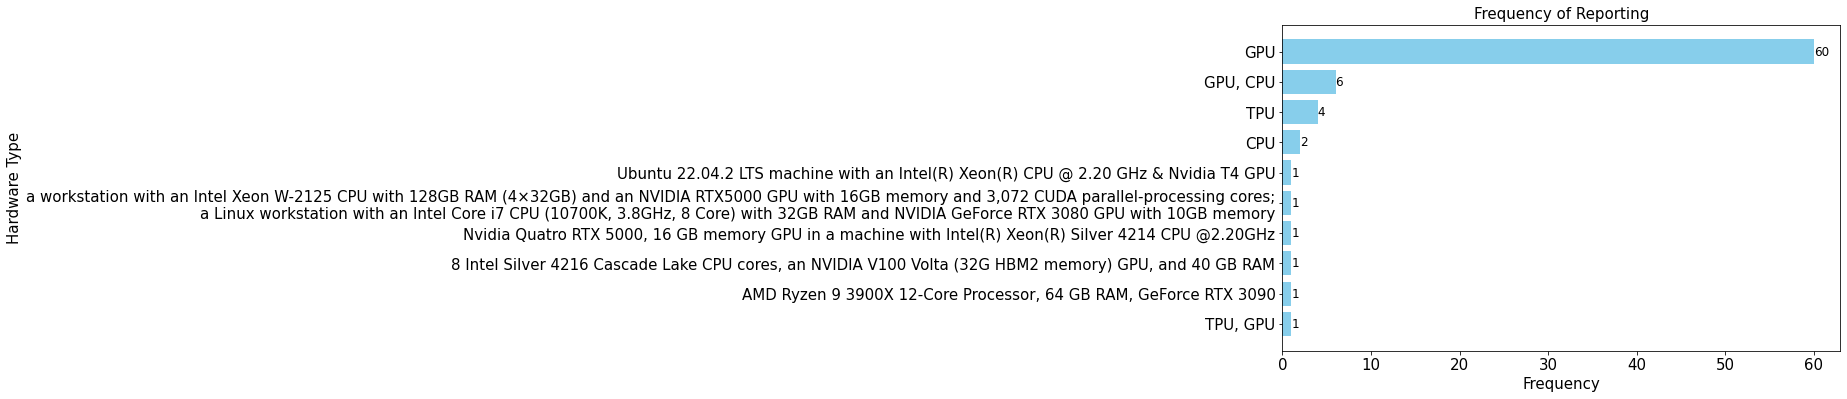

In [624]:
# Get the count of unique values in the "Hardware type" column
hardware_type_counts = df_technical_setup['Hardware type'].value_counts()
hardware_type_counts = hardware_type_counts.sort_values(ascending=True)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(hardware_type_counts.index, hardware_type_counts, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Hardware Type', fontsize=15)
plt.title('Frequency of Reporting', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/technical_hardware_used_2024.png'.format(top_n))

# Display the chart
plt.show()


In [623]:
hardware_type_counts

TPU, GPU                                                                                                                                                                                                                                                                                            1
AMD Ryzen 9 3900X 12-Core Processor, 64 GB RAM, GeForce RTX 3090                                                                                                                                                                                                                                    1
8 Intel Silver 4216 Cascade Lake CPU cores, an NVIDIA V100 Volta (32G HBM2 memory) GPU, and 40 GB RAM                                                                                                                                                                                               1
Nvidia Quatro RTX 5000, 16 GB memory GPU in a machine with Intel(R) Xeon(R) Silver 4214 CPU @2.20GHz                  

/var/folders/px/wtj901jn7z9f26xgbys4l7jh0000gp/T/ipykernel_38901/3897075069.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



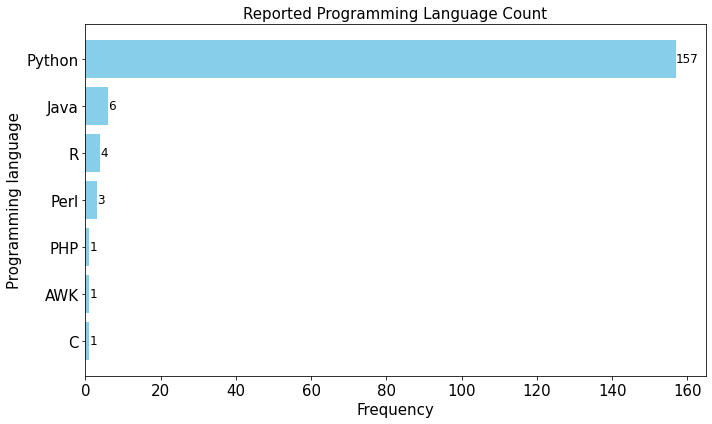

In [630]:
import pandas as pd
import matplotlib.pyplot as plt

# Split the values in the "Programming language" column by ","
df_technical_setup['Programming language'] = df_technical_setup['Programming language'].str.split(', ')

# Explode the list into separate rows
df_technical_setup = df_technical_setup.explode('Programming language')

# Get the count of unique values in the "Programming language" column
programming_language_counts = df_technical_setup['Programming language'].value_counts()
programming_language_counts = programming_language_counts.sort_values(ascending=True)

# Create a horizontal bar chart for the counts
plt.figure(figsize=(10, 6))
bars = plt.barh(programming_language_counts.index, programming_language_counts, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Programming language', fontsize=15)
plt.title('Reported Programming Language Count', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/technical_programming_language_count_2024.png')

# Display the chart
plt.show()


In [292]:
programming_language_counts

Python, R              1
Python, C              1
Python, Perl, AWK      1
Python, Java           6
Python               105
Name: Programming language, dtype: int64

In [666]:
# Create a new column to store the flattened data types
df_technical_setup['Flattened_Libraries'] = df_technical_setup['Library/Framework Harmonized'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df_technical_setup.explode('Flattened_Libraries')
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].str.lower()

df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("nltk", "NLTK")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("transformers", "HuggingFace")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("transformer", "HuggingFace")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("huggingface", "HuggingFace")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("tensorflow", "TensorFlow")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("pytorch", "PyTorch")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("stanford corenlp", "Stanford CoreNLP ")
 

# Count the frequency of each data type
library_counts_flat = df_exploded['Flattened_Libraries'].value_counts()

In [667]:
# Get the top 10 categories
top_10_libraries = library_counts_flat.head(10)

# Sort the categories in descending order
top_10_libraries = top_10_libraries.sort_values(ascending=True)
top_10_libraries

neo4j                 4
gensim                5
Stanford CoreNLP      6
keras                 7
spacy                10
NLTK                 12
scikit-learn         20
TensorFlow           30
PyTorch              45
HuggingFace          78
Name: Flattened_Libraries, dtype: int64

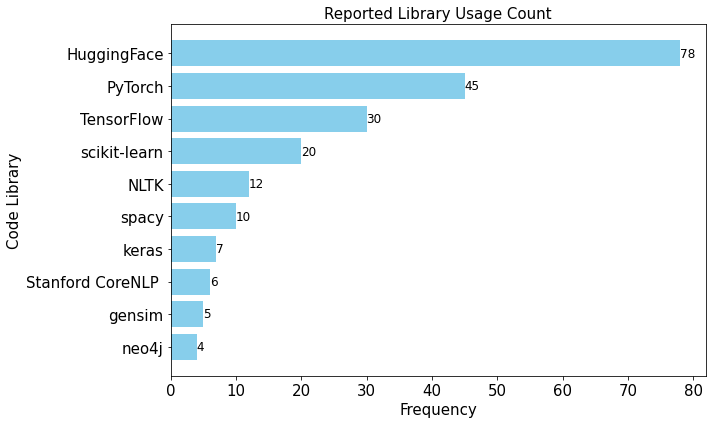

In [668]:
#library_counts = df['Library/Framework Harmonized'].value_counts()
#library_counts = library_counts.sort_values(ascending=True)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_libraries.index, top_10_libraries, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Code Library', fontsize=15)
plt.title('Reported Library Usage Count', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/technical_code_library_count_2024.png')

# Display the chart
plt.show()

In [665]:
library_counts_flat

HuggingFace                       78
PyTorch                           45
TensorFlow                        30
scikit-learn                      20
NLTK                              12
spacy                             10
keras                              7
stanford corenlp                   6
gensim                             5
neo4j                              4
torch                              4
numpy                              4
scipy                              3
pytorch (dgl-ke package)           3
scispacy                           3
allennlp                           2
entrez                             2
fairseq                            2
requests                           2
bertopic                           2
boto3                              2
subword-nmt                        2
rdkit                              2
top2vec                            2
chainer-chemistry                  2
r topicmodels                      2
tqdm                               2
c

## Data and Code Availability

In [669]:
df_transparency = df[["year", "Source code availability", "Data used availability", "Hosted Application for End-users", "publication_type"]]
df_transparency.fillna("no", inplace=True)

/Users/donevas/opt/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [670]:
df_transparency['Hosted Application for End-users'] = df_transparency['Hosted Application for End-users'].str.split(':|,', n=1).str[0]


/var/folders/px/wtj901jn7z9f26xgbys4l7jh0000gp/T/ipykernel_38901/2614672984.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [671]:
df_transparency

,year,Source code availability,Data used availability,Hosted Application for End-users,publication_type
0,2021,no,partially,no,biomedical_journal
1,2021,no,no,yes,biomedical_journal
2,2020,yes,yes,no,biomedical_journal
3,2023,yes,yes,no,biomedical_journal
4,2021,yes,no,no,biomedical_journal
5,2022,yes,yes,no,biomedical_journal
6,2021,yes,yes,no,biomedical_journal
7,2019,no,yes,no,biomedical_journal
8,2023,no,yes,yes,biomedical_journal
9,2021,no,yes,yes,biomedical_journal


In [672]:
# Group by year and calculate the percentages for each category
result_by_year = df_transparency.groupby("year").agg({
    "Source code availability": lambda x: (x == "yes").mean() * 100,
    "Data used availability": lambda x: (x == "yes").mean() * 100,
    "Hosted Application for End-users": lambda x: (x == "yes").mean() * 100
}).reset_index()

# Rename columns for clarity
result_by_year.columns = ["Year", "Source code availability (%)", "Data used availability (%)", "Hosted Application for End-users (%)"]
result_by_year

,Year,Source code availability (%),Data used availability (%),Hosted Application for End-users (%)
0,2019,18.181818,81.818182,9.090909
1,2020,59.375000,96.875000,6.250000
2,2021,41.463415,73.170732,12.195122
3,2022,54.761905,71.428571,14.285714
4,2023,11.111111,16.666667,1.388889
5,2024,0.000000,0.000000,0.000000


In [673]:
result = df_transparency.groupby("publication_type").agg({
    "Source code availability": lambda x: (x == "yes").mean() * 100,
    "Data used availability": lambda x: (x == "yes").mean() * 100,
    "Hosted Application for End-users": lambda x: (x == "yes").mean() * 100
}).reset_index()

# Rename columns for clarity
result.columns = ["publication_type", "Source code availability (%)", "Data used availability (%)", "Hosted Application for End-users (%)"]
result

,publication_type,Source code availability (%),Data used availability (%),Hosted Application for End-users (%)
0,biomedical_journal,34.782609,48.550725,9.420290
1,nlp_venue,34.426230,73.770492,3.278689


In [674]:
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.0f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=15)

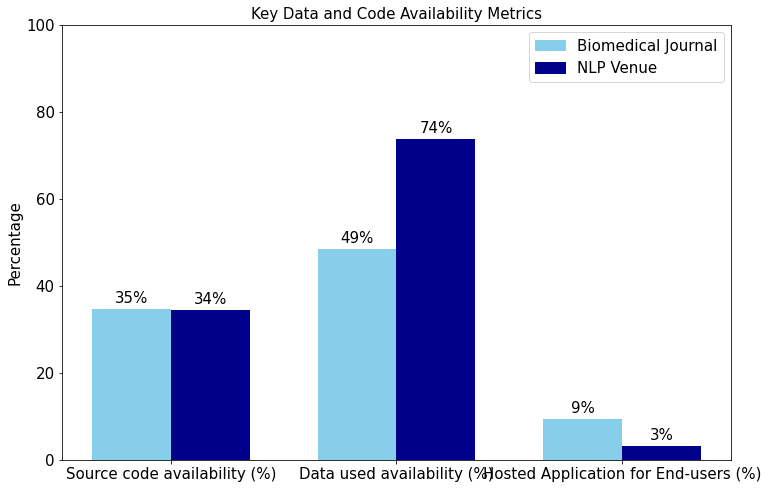

In [675]:
from matplotlib.patches import Patch

# Adjusted code

fig, ax = plt.subplots(figsize=(12, 8))  # Increased plot size

# The x position for each bar
bar_width = 0.35
index = np.arange(len(result.columns) - 1)

bar1 = ax.bar(index, result.iloc[0, 1:], bar_width, label="Biomedical Journal", color='skyblue')
bar2 = ax.bar(index + bar_width, result.iloc[1, 1:], bar_width, label="NLP Venue", color='darkblue')

#ax.set_xlabel('Category', fontsize=15)
ax.set_ylabel('Percentage', fontsize=15)
ax.set_title('Key Data and Code Availability Metrics', fontsize=15)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(result.columns[1:], fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylim(0, 100)

# Adding percentage labels on the bars
add_labels(bar1)
add_labels(bar2)

# Create legend handles for each category
legend_handles = [Patch(color='skyblue', label='Biomedical Journal'), Patch(color='darkblue', label='NLP Venue')]

# Add color legend
plt.legend(handles=legend_handles, fontsize=15)
plt.savefig('viz/rs_transparency_overview_2024.png')

plt.show()


In [443]:
df_overview = df_transparency.groupby(['publication_type', 'New dataset developed']).size().reset_index(name='counts')
df_overview

,publication_type,New dataset developed,counts
0,biomedical_journal,no,49
1,biomedical_journal,yes,40
2,nlp_venue,no,30
3,nlp_venue,yes,22


In [444]:
df_overview = df_transparency.groupby(['publication_type', 'Source code availability']).size().reset_index(name='counts')
df_overview

,publication_type,Source code availability,counts
0,biomedical_journal,no,41
1,biomedical_journal,yes,48
2,nlp_venue,no,31
3,nlp_venue,yes,21


In [445]:
# Group by "publication_type" and "Source code availability" and calculate the percentage
df_grouped = df_transparency.groupby(['publication_type', 'Source code availability']).size().unstack(fill_value=0)
df_grouped_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
df_grouped_percentage

Source code availability,no,yes
publication_type,,
biomedical_journal,46.067416,53.932584
nlp_venue,59.615385,40.384615


In [446]:
df_grouped = df_transparency.groupby(['publication_type', 'Data used availability']).size().unstack(fill_value=0)
df_grouped_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
df_grouped_percentage

Data used availability,no,partially,yes
publication_type,,,
biomedical_journal,21.348315,3.370787,75.280899
nlp_venue,13.461538,0.000000,86.538462


<Figure size 1440x216 with 0 Axes>

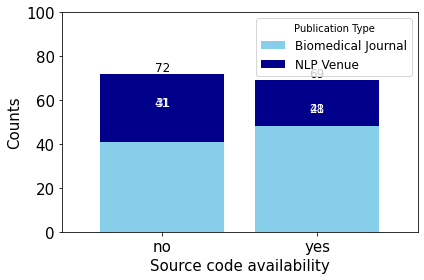

In [428]:
# Create a larger figure
plt.figure(figsize=(20, 3))

# Group by "Source code availability" and "publication_type", then count the occurrences
counts = df_transparency.groupby(['Source code availability', 'publication_type']).size().unstack(fill_value=0)

# Plot the stacked bar chart
bars = counts.plot(kind='bar', stacked=True, color=['skyblue', 'darkblue'], width=0.8)

# Add count values as annotations for each bar
for i, source_avail in enumerate(counts.index):
    for pub_type, count in zip(counts.columns, counts.loc[source_avail]):
        total_count = counts.sum(axis=1)[source_avail]
        plt.text(i, total_count - 13, str(count), color='white' if count < counts.sum(axis=1).max() else 'black', ha='center', va='center', fontsize=12)

# Add total count values on top of each bar
for i, total_count in enumerate(counts.sum(axis=1)):
    plt.text(i, total_count, str(total_count), color='black', ha='center', va='bottom', fontsize=12)
    
# Customize the plot
plt.xticks(range(len(counts.index)), counts.index, rotation=0, fontsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel('Source code availability', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(['Biomedical Journal', 'NLP Venue'], title='Publication Type', fontsize=12)

# Set the y-axis limit to ensure it reaches up to 100
plt.ylim(0, 100)

# Tight layout for better visualization
plt.tight_layout()

# Display the chart
plt.show()

## Sanky Diagram

In [122]:
%pip install pySankey

DEPRECATION: prodigy 1.11.8 has a non-standard dependency specifier srsly>=2.0.0<3.0.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of prodigy or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [123]:
%pip install webcolors

DEPRECATION: prodigy 1.11.8 has a non-standard dependency specifier srsly>=2.0.0<3.0.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of prodigy or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [404]:
# Group by 'Biomedical Domain Level 1' and 'Target application' and count
count_df = df.groupby(['Biomedical Domain Level 1', 'Target application']).size().reset_index(name='Sum of Included')

# Sort the DataFrame based on the count in descending order
count_df = count_df.sort_values(by='Sum of Included', ascending=False).reset_index(drop=True)
count_df.head()

,Biomedical Domain Level 1,Target application,Sum of Included
0,Knowledge Management,Text Classification,18
1,General biomedical text mining,Multi-Domain,13
2,Pharma,Relation Extraction,13
3,Knowledge Management,Information Retrieval,11
4,General biomedical text mining,Named Entity Recognition,9


In [423]:
top_5_domains = df['Biomedical Domain Level 1'].value_counts().head(5).index.tolist()
top_5_domains

['Knowledge Management',
 'General biomedical text mining',
 'Pharma',
 'Media for Health Care',
 'Clinical']

In [424]:
filtered_count_df = count_df[count_df["Biomedical Domain Level 1"].isin(top_5_domains)]


In [425]:
l1 = filtered_count_df["Biomedical Domain Level 1"].to_list()
l2 = filtered_count_df["Target application"].to_list()
connect_values = count_df["Sum of Included"].to_list()
levels_combined = list(set(l1+l2))
levels_combined

['Information Retrieval',
 'Text Summarization',
 'Fact Verification',
 'General biomedical text mining',
 'Multi-Domain',
 'Pharma',
 'Knowledge Management',
 'Question Answering',
 'Entity Normalization/Linking',
 'Text Classification',
 'Machine Reading Coprehension',
 'Explainable AI',
 'Named Entity Recognition',
 'Similarity Clustering',
 'Media for Health Care',
 'Knowledge Graph',
 'Relation Extraction',
 'Other',
 'Information Extraction',
 'Clinical']

In [426]:
#node_label = ["A1", "A2", "B1", "B2","B3", "C1", "C2"]
node_dict = {y:x for x, y in enumerate(levels_combined)}
node_dict

{'Information Retrieval': 0,
 'Text Summarization': 1,
 'Fact Verification': 2,
 'General biomedical text mining': 3,
 'Multi-Domain': 4,
 'Pharma': 5,
 'Knowledge Management': 6,
 'Question Answering': 7,
 'Entity Normalization/Linking': 8,
 'Text Classification': 9,
 'Machine Reading Coprehension': 10,
 'Explainable AI': 11,
 'Named Entity Recognition': 12,
 'Similarity Clustering': 13,
 'Media for Health Care': 14,
 'Knowledge Graph': 15,
 'Relation Extraction': 16,
 'Other': 17,
 'Information Extraction': 18,
 'Clinical': 19}

In [427]:
source = l1 #['A1','A1','A1','A2','A2','A2','B1','B2','B2','B3','B3']
target = l2 #['B1','B2','B3','B1','B2','B3','C1','C1','C2','C1','C2'] 
values = connect_values #[ 10, 5, 15, 5, 20, 45, 15, 20, 5, 30, 30 ]

In [428]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [429]:
#source_node

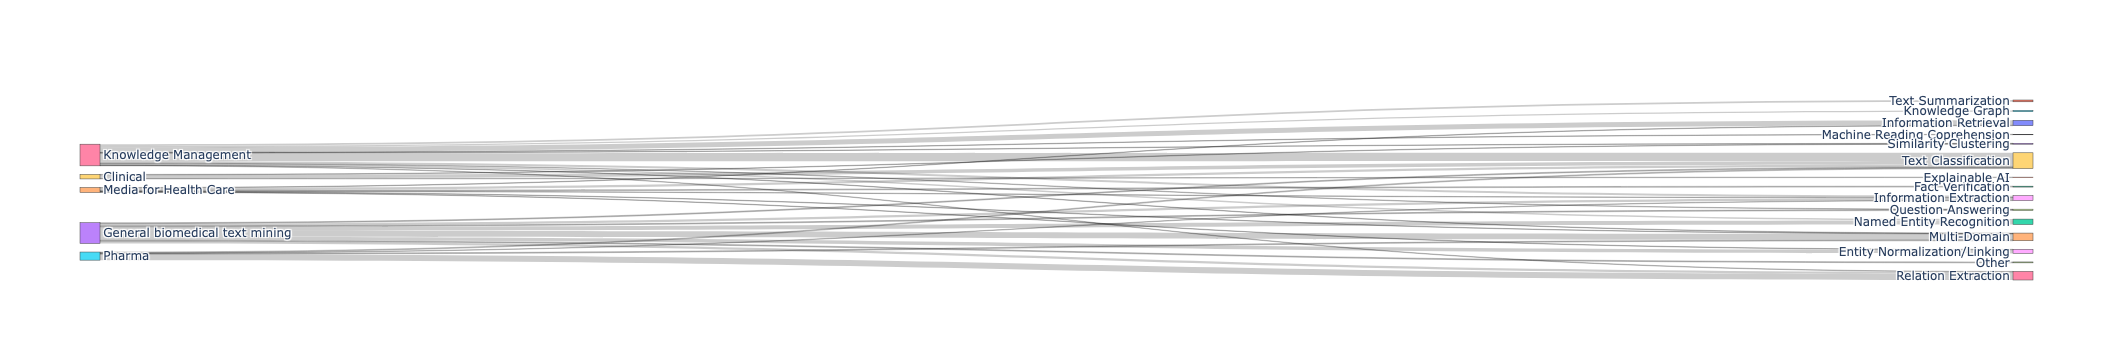

In [431]:
import plotly.graph_objects as go # Import the graphical object

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = levels_combined
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=900, 
     image_height=600
)
# And shows the plot
fig.show()

# Abstracts Clustering

In [3]:
!pip install wordcloud

In [198]:
df =pd.read_excel("data/Scoping_review_text-analysis_extraction_20231115.xlsx", sheet_name="Harmonized Information Extracti")


In [199]:
df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP
0,NaN,NaN,NaN,NaN,NaN,NaN,"SD, BVI","0=no, 1=yes","No biomedical domain, no LLMs, grey literature...",NLP task solved - selection,"free text e.g., drug-drug interaction, in vivo...",for what kind of data has the application been...,NaN,NaN,"yes, if there is a public interface providing ...","free text, if no LLM was used, which technolog...","free text, e.g. BERT",other models that are combined in the overall ...,"free text, e.g. flow of the data through the s...","free text, language used for the model develop...","free text, e.g. PyTorch, Tensorflow, HuggingFace","free text, e.g. PyTorch, Tensorflow, HuggingFace","free text, e.g. accuracy, F1, Presision, Recall","free text, e.g. accuracy, F1, Presision, Recall","free text, e.g. yes/no","if source code available, link to the repository","free text, e.g. yes/no and link to the repository","free text, e.g. tokenization, lemmatization, ...","- corpus origin: free text, e.g. Wiki Articles...","corpus size: numeric, e.g. nr of docs, tokens;",Which data was used to train and evaluate the ...,NaN,NaN,"yes/no, if the authors introduce a new custom ...","fine-tuning corpus size: numeric, e.g. nr of d...",on how many datasets was the performance repor...,"free text, type of hardware and its characteri...","only the type of hardware used, e.g. GPU, TPU,...",yes/no for Is the process of splitting trainin...,"free text, answer to Are there methods describ...",yes/no for Does the dataset or assessment meas...,"If AC column yes, which benchmark did the stud...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"A, P. Tafti and Badger, J. and LaRose, E. and ...",10.2196/medinform.9170,https://doi.org/10.2196/medinform.9170,Adverse Drug Event Discovery Using Biomedical ...,JMIR Medical Informatics,2017.0,BVI,0.0,No LLMs,Text Classification,adverse drug discovery,NaN,NaN,NaN,no,word2vec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,A_2017_JMIRMediInfo,JOUR,BACKGROUND: The study of adverse drug events (...,"P Tafti, Ahmad. Biomedical Informatics Researc...",29222076.0,NaN,4.0,NaN,English,2291-9694,e51,5.0,2023-12-08 00:00:00,MEDLINE,Ovid Technologies,1.0,JMIR Med Inform,NaN,"P Tafti, Ahmad Badger, Jonathan LaRose, Eric S...",Adverse Drug Event Discovery Using Biomedical ...,NaN,NaN,NaN,NaN,NaN
2,"Abd-Alrazaq, A. and Schneider, J. and Mifsud, ...",10.2196/23703,https://doi.org/10.2196/23703,A Comprehensive Overview of the COVID-19 Liter...,Journal of Medical Internet Research,2021.0,BVI,0.0,No LLMs,Similarity Clustering,"for Covid-19, group published articles based o...",NaN,NaN,NaN,no,"TF-IDF, k-means",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abd.Alrazaq_2021_JoofMeInRe,JOUR,BACKGROUND: Short

In [200]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 2: Preprocess the abstracts (tokenization, lowercase, stop words removal, etc.)
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercase conversion
    tokens = [token.lower() for token in tokens]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove the word 'model'
    #tokens = [token for token in tokens if token != 'model']
    #tokens = [token for token in tokens if token != 'method']
    #tokens = [token for token in tokens if token != 'task']

    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

df['Preprocessed_Abstract'] = df['abstract'].apply(preprocess_text)

# Step 3: Vectorize the abstracts
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Step 4: Choose a clustering algorithm (K-means in this example)
num_clusters = 4  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Step 5: Apply the clustering algorithm
# List of cluster labels
cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# List of unique cluster labels
unique_clusters = np.unique(cluster_labels)

# List of colors for each cluster label
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Create a larger figure
plt.figure(figsize=(10, 8))

# Scatter plot of PCA-transformed data points with cluster labels as colors
for cluster_label, color in zip(unique_clusters, colors):
    mask = cluster_labels == cluster_label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=color, label=f'Cluster {cluster_label}')

plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('Visuals/cluster_vis_tfidf_pca.png')  # Change the format and resolution as needed
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donevas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/donevas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: expected string or bytes-like object

In [143]:
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the number of documents in each cluster
for i, count in cluster_counts.items():
    print(f"Cluster {i}: {count} documents")

Cluster 0: 39 documents
Cluster 3: 19 documents
Cluster 1: 16 documents
Cluster 2: 15 documents


### dynamic exploration

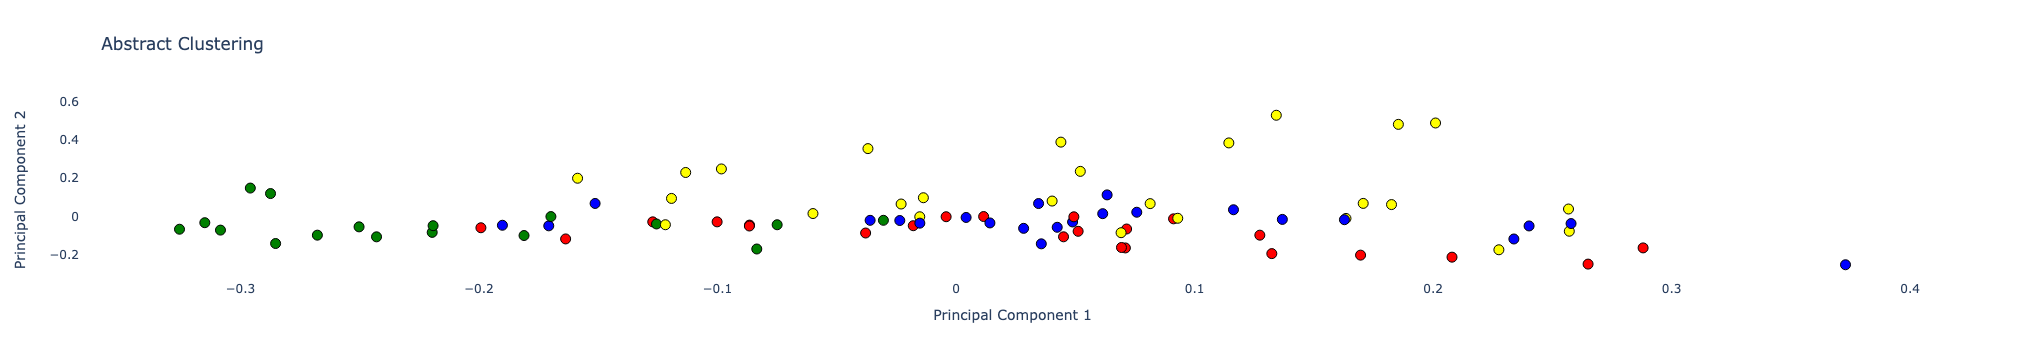

In [22]:
df['Cluster'] = cluster_labels

import plotly.graph_objects as go # Import the graphical object
import plotly.colors as colors


# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'yellow', 'orange']

fig = go.Figure(data=go.Scatter(
    x=X_pca[:, 0], y=X_pca[:, 1],
    mode='markers',
    marker=dict(
        color=[cluster_colors[label] for label in cluster_labels],
        size=10,  # Adjust the marker size here
        line=dict(width=1, color='Black')
    ),
    hovertemplate='<b>Title:</b> %{text}',
    text=df['title']
))


# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)

plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=800
)

# Show the plot
fig.show()



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


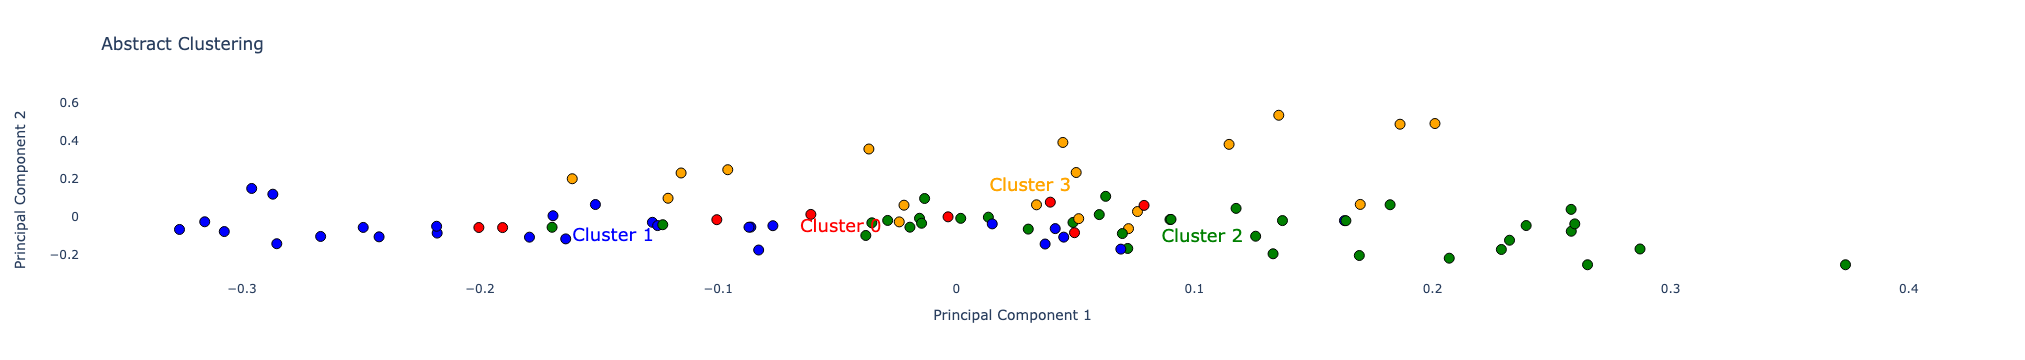

In [157]:
import plotly.graph_objects as go

# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'orange', 'orange']

# Define cluster names (you can customize this based on your requirement)
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig = go.Figure()

# Add scatter plot for data points
fig.add_trace(go.Scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    mode='markers',
    marker=dict(
        color=[cluster_colors[label] for label in cluster_labels],
        size=10,  # Adjust the marker size here
        line=dict(width=1, color='Black')
    ),
    hovertemplate='<b>Title:</b> %{text}',
    text=df['title'],
    showlegend=False  # Hide the legend for data points
))

# Add text annotations for cluster names
for i, name in enumerate(cluster_names):
    cluster_x = X_pca[cluster_labels == i, 0].mean()  # Calculate mean x position for the cluster
    cluster_y = X_pca[cluster_labels == i, 1].mean()  # Calculate mean y position for the cluster
    fig.add_trace(go.Scatter(
        x=[cluster_x],
        y=[cluster_y],
        mode='text',
        text=[name],
        showlegend=False,
        textposition='bottom center',
        textfont=dict(size=18, color=cluster_colors[i])  # Set the text font size to 18 (you can adjust this value)
    ))

# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)

plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)

# Show the plot
fig.show()


### word clouds

In [152]:
from wordcloud import WordCloud

In [91]:
term_frequencies[0, tfidf_vectorizer.vocabulary_['model']]

4.040498806970412

In [115]:
# Calculate the sum of TF-IDF scores for each term
term_scores = np.sum(tfidf_matrix, axis=0)

# Get the vocabulary indices for the terms
vocab_indices = np.array(list(tfidf_vectorizer.vocabulary_.values()))

# Sort the terms based on their sum of TF-IDF scores in descending order
sorted_indices = np.argsort(-term_scores[0, vocab_indices])

# Get the top 10 most frequent words
top_10_indices = sorted_indices[0, : 10]
top_10_words = [tfidf_vectorizer.get_feature_names_out()[vocab_indices[i]] for i in top_10_indices]
top_10_words

[array([['biomedical', 'model', 'drug', 'text', 'bert', 'models', 'task',
         'extraction', 'performance', 'literature']], dtype=object)]

In [113]:
sorted_indices

matrix([[   9,  107,  405, ..., 2603, 2585, 2573]])

In [88]:
average_frequency

781.4946129017154

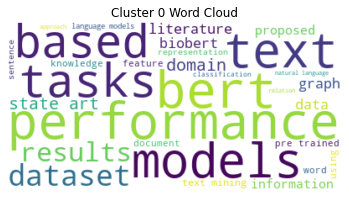

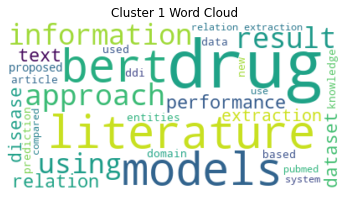

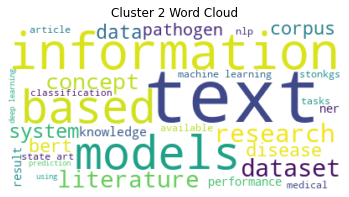

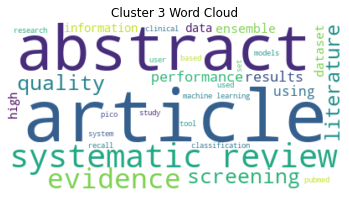

In [154]:
cluster_labels = kmeans.labels_

# Step 8: Calculate term frequencies across all clusters
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Calculate the term frequencies
term_frequencies = np.sum(tfidf_matrix, axis=0)

threshold = 3

words_to_remove = ['method', 'task', 'model', 'methods', 'biomedical']

for i in range(num_clusters):
    cluster_abstracts = df.loc[df['Cluster'] == i, 'Preprocessed_Abstract']
    cluster_text = ' '.join(cluster_abstracts)
    cluster_text = ' '.join(word for word in cluster_text.split() if word not in words_to_remove)

    
    # Generate the word cloud
    wordcloud = WordCloud(background_color='white', max_words=30).generate(cluster_text)
    
    # Apply the term frequency threshold
    word_frequencies = wordcloud.process_text(cluster_text)
    # Apply the term frequency threshold
    filtered_words = [word for word in word_frequencies.keys() if word in tfidf_vectorizer.vocabulary_ and term_frequencies[0, tfidf_vectorizer.vocabulary_[word]] <= threshold]
    #print(filtered_words)
    #wordcloud.words_ = {word: freq for word, freq in word_frequencies.items() if word in filtered_words}
    #print(wordcloud.words_)

    
    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i} Word Cloud')
    plt.savefig('Visuals/word_cloud_cluster_{}.png'.format(i))  # Change the format and resolution as needed
    plt.show()

In [77]:
tfidf_vectorizer.vocabulary_['motivation']

1739

In [78]:
term_frequencies[0, 1739]

0.43660389232414387

In [134]:
# Sort the dictionary items based on their values in descending order
sorted_items = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 dictionary objects (key-value pairs) based on the values
top_10_dict_objects = dict(sorted_items[:10])

print(top_10_dict_objects)

{'models': 28, 'quality': 27, 'systematic review': 26, 'evidence': 22, 'screening': 20, 'article': 20, 'abstract': 19, 'dataset': 18, 'using': 17, 'high': 16}


### using bioBERT embeddings

In [7]:
from transformers import AutoModel, AutoTokenizer

In [39]:
# Step 3: Load BioBERT model and tokenizer
#model_name = "dmis-lab/biobert-base-cased-v1.1"
#model = AutoModel.from_pretrained(model_name)
#tokenizer = AutoTokenizer.from_pretrained(model_name)

# Step 3: Load PubMedBERT model and tokenizer
model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract"
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Step 4: Tokenize and encode the texts
encoded_inputs = tokenizer(df['Preprocessed_Abstract'].tolist(), padding=True, truncation=True, return_tensors="pt")

# Step 5: Obtain the embeddings from BioBERT
outputs = model(**encoded_inputs)
embeddings = outputs.last_hidden_state

# Reshape the embeddings to have two dimensions
embeddings_2d = embeddings[:, 0, :].detach().numpy()

# Step 6: Apply the clustering algorithm (K-means in this example)
num_clusters = 4  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(embeddings_2d)

# Step 7: Assign cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_


Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no 

In [40]:
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the number of documents in each cluster
for i, count in cluster_counts.items():
    print(f"Cluster {i}: {count} documents")

Cluster 1: 43 documents
Cluster 3: 19 documents
Cluster 2: 17 documents
Cluster 0: 10 documents


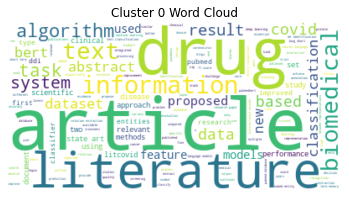

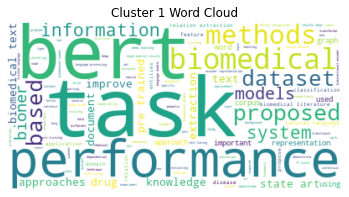

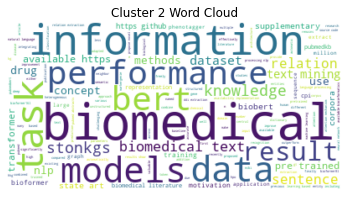

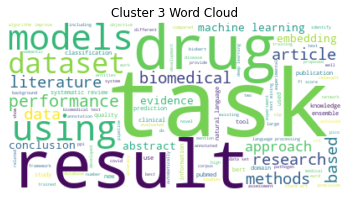

In [41]:
cluster_labels = kmeans.labels_

# Step 6: Generate a word cloud for each cluster
for i in range(num_clusters):
    cluster_abstracts = df.loc[cluster_labels == i, 'Preprocessed_Abstract']
    cluster_text = ' '.join(cluster_abstracts)
    
    # Generate the word cloud
    wordcloud = WordCloud(background_color='white').generate(cluster_text)
    
    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i} Word Cloud')
    plt.show()

In [42]:
pca = PCA(n_components=2, random_state=42)
embeddings_2d_pca = pca.fit_transform(embeddings_2d)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


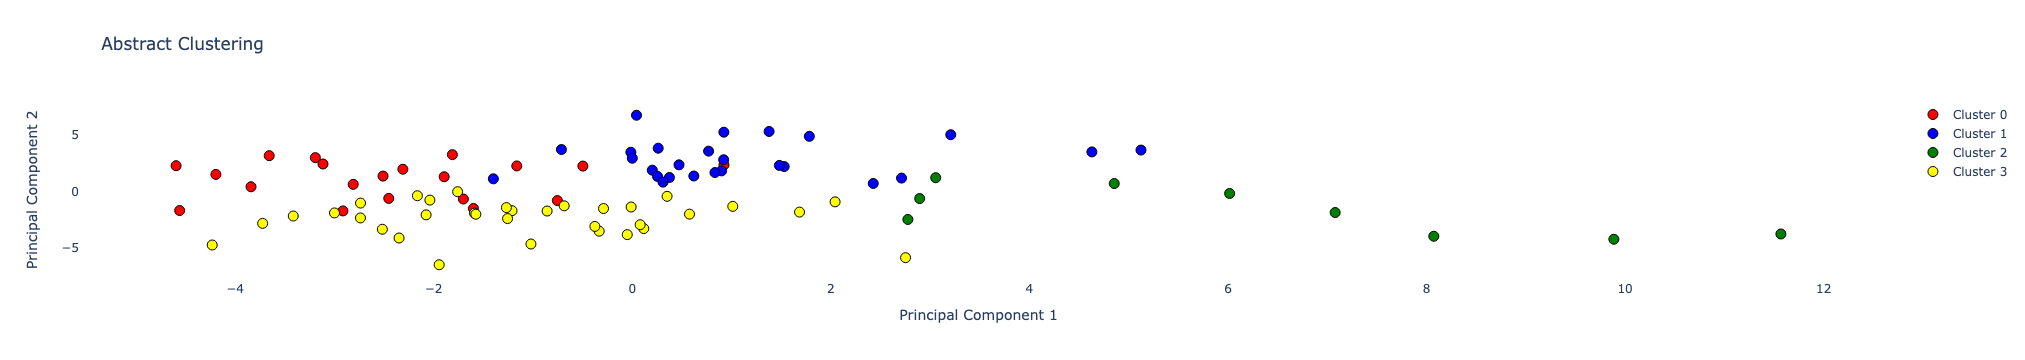

In [48]:
import plotly.graph_objects as go # Import the graphical object
import plotly.colors as colors


# Define custom colors for each cluster label
cluster_colors = ['red', 'blue', 'green', 'yellow', 'orange']

fig = go.Figure()

# Reset the figure
fig.data = []

# Add scatter plots for each cluster
for label in set(cluster_labels):
    cluster_df = df[df['Cluster'] == label]
    fig.add_trace(go.Scatter(
        x=embeddings_2d_pca[cluster_df.index, 0],
        y=embeddings_2d_pca[cluster_df.index, 1],
        mode='markers',
        marker=dict(
            color=cluster_colors[label],
            size=10,  # Adjust the marker size here
            line=dict(width=1, color='Black')
        ),
        hovertemplate='<b>Title:</b> %{text}',
        text=cluster_df['title'],
        name=f'Cluster {label}'
    ))


# Set plot title and axis labels
fig.update_layout(
    title='Abstract Clustering',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    plot_bgcolor='white'  # Set the background color to white
)


# With this save the plots 
plot(fig,
     image_filename='abstracts_cluster_bert_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

In [370]:
len(embeddings_2d[0])

768

# Summer School
vis https://www.sciencedirect.com/science/article/pii/S0950584921000690

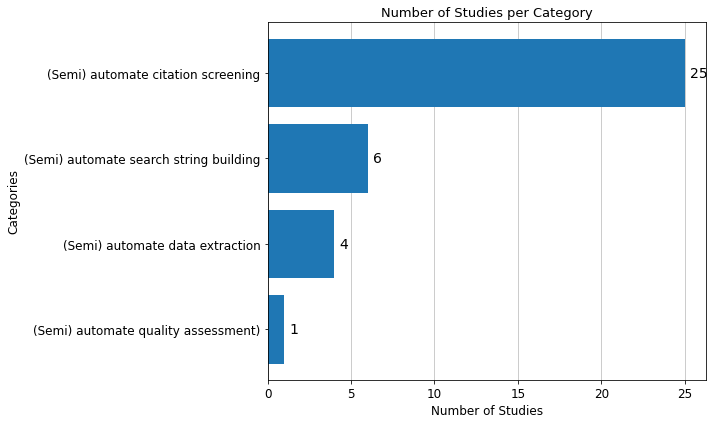

In [584]:
import matplotlib.pyplot as plt

categories = ['(Semi) automate citation screening', '(Semi) automate search string building', '(Semi) automate data extraction', '(Semi) automate quality assessment)']
nr_studies = [25, 6, 4, 1]

sorted_indices = sorted(range(len(nr_studies)), key=lambda k: nr_studies[k])
sorted_categories = [categories[i] for i in sorted_indices]
sorted_nr_studies = [nr_studies[i] for i in sorted_indices]

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars and set their zorder to be higher than the grid lines
bars = ax.barh(sorted_categories, sorted_nr_studies, zorder=1)

# Add labels on the bars
for bar in bars:
    value = bar.get_width()
    ax.text(value + 0.3, bar.get_y() + bar.get_height()/2, str(value), va='center', color='black', fontsize=14)

ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', alpha=0.5)

plt.ylabel('Categories', fontsize=12)  # Increase font size for ylabel
plt.xlabel('Number of Studies', fontsize=12)  # Increase font size for xlabel
plt.title('Number of Studies per Category', fontsize=13)  # Increase font size for title

# Increase font size of tick labels on both axes
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

# Save the figure
plt.savefig('bar_chart.png', dpi=300)  # Change the filename and dpi as needed

plt.show()


In [581]:
!ls

Literature Review.ipynb
README.md
bar_chart_sr_automation_summer_school.png
data
temp-plot.html
viz
